# Loading modules

In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 
import glob
import re
import nc_time_axis
import time 

def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


/tmp/ipykernel_40161/2713065812.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# File reading

## Algorithm output for SpE Events

In [2]:
WACCM_UL = 150
ds_months_ar = np.arange(0,3)   

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']

run_name = 'Solar_Comp'

filename_append = '0.25sigma_2xMpza_1xpeak'     

#----------------------------------------------------------------------------------------

win_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_med = xr.open_dataset(win_file_med, decode_times=False)
ds_spr_med = xr.open_dataset(spr_file_med, decode_times=False)
ds_sum_med = xr.open_dataset(sum_file_med, decode_times=False)
ds_aut_med = xr.open_dataset(aut_file_med, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_min = xr.open_dataset(win_file_min, decode_times=False)
ds_spr_min = xr.open_dataset(spr_file_min, decode_times=False)
ds_sum_min = xr.open_dataset(sum_file_min, decode_times=False)
ds_aut_min = xr.open_dataset(aut_file_min, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_max = xr.open_dataset(win_file_max, decode_times=False)
ds_spr_max = xr.open_dataset(spr_file_max, decode_times=False)
ds_sum_max = xr.open_dataset(sum_file_max, decode_times=False)
ds_aut_max = xr.open_dataset(aut_file_max, decode_times=False)

#----------------------------------------------------------------------------------------

os.chdir('/nobackup')
win_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_cli = xr.open_dataset(win_file_cli, decode_times=False)
ds_spr_cli = xr.open_dataset(spr_file_cli, decode_times=False)
ds_sum_cli = xr.open_dataset(sum_file_cli, decode_times=False)
ds_aut_cli = xr.open_dataset(aut_file_cli, decode_times=False)

#----------------------------------------------------------------------------------------

ds_sum_cli

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 6.0 7.0 8.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

## Data Handling

In [3]:
lev_sl = ds_win_med.variables['lev_sl']
lat = ds_win_med.variables['lat']
intlat = ds_win_med.variables['latsl']
lon = ds_win_med.variables['lon']
LT = ds_win_med.variables['LT']
LT_L = ds_win_med['LT_L']

altavg_sl_win = ds_win_med.variables['altavg_sl']
altavg_sl_spr = ds_spr_med.variables['altavg_sl']
altavg_sl_sum = ds_sum_med.variables['altavg_sl']
altavg_sl_aut = ds_aut_med.variables['altavg_sl']

times_str_min = ds_win_med.variables['times_str_min']
times_str_max = ds_win_med.variables['times_str_max']

In [4]:
# SOLAR MED 

#=====================================================================

# Winter

med_win_SpEs_Occ_Freq_llbav = ds_win_med.variables['SpEs_Occ_Freq_llbav']  #lat,LT
med_win_SpEsns_Occ_Freq_llav = ds_win_med.variables['SpEsns_Occ_Freq_llav']  #lat,lon
med_win_SpEsns_Occ_Freq_lat = ds_win_med.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# med_win_SpEsns_Occ_Fr_dsavg = ds_win_med.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# med_win_SpEs_Occ_Fr_b_dsavg = ds_win_med.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# med_win_alt_sl_sh_avg_b_dsavg = ds_win_med.variables['alt_sl_sh_avg_b_dsavg']
# med_win_alt_sl_sh_avg_b_dsavgg = win_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# med_win_SpEs_Occ_Fr_b_dsavgLT = ds_win_med.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# med_win_alt_sl_sh_avg_b_dsavgLT = ds_win_med.variables['alt_sl_sh_avg_b_dsavgLT']
# med_win_alt_sl_sh_avg_b_dsavgLTT = win_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# med_win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win_med.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
# med_win_alt_sl_sh_avg_bb_5d_dsavg = ds_win_med.variables['alt_sl_sh_avg_bb_5d_dsavg']
# med_win_alt_sl_sh_avg_bb_5d_dsavgg = win_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

# Spring

med_spr_SpEs_Occ_Freq_llbav = ds_spr_med.variables['SpEs_Occ_Freq_llbav']  #lat,LT
med_spr_SpEsns_Occ_Freq_llav = ds_spr_med.variables['SpEsns_Occ_Freq_llav']  #lat,lon
med_spr_SpEsns_Occ_Freq_lat = ds_spr_med.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# med_spr_SpEsns_Occ_Fr_dsavg = ds_spr_med.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
# med_spr_SpEs_Occ_Fr_b_dsavg = ds_spr_med.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
# med_spr_alt_sl_sh_avg_b_dsavg = ds_spr_med.variables['alt_sl_sh_avg_b_dsavg']
# med_spr_alt_sl_sh_avg_b_dsavgg = spr_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# med_spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr_med.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# med_spr_alt_sl_sh_avg_b_dsavgLT = ds_spr_med.variables['alt_sl_sh_avg_b_dsavgLT']
# med_spr_alt_sl_sh_avg_b_dsavgLTT = spr_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# med_spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
# med_spr_alt_sl_sh_avg_bb_5d_dsavg = ds_spr.variables['alt_sl_sh_avg_bb_5d_dsavg']
# med_spr_alt_sl_sh_avg_bb_5d_dsavgg = spr_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

# Summer 

med_sum_SpEs_Occ_Freq_llbav = ds_sum_med.variables['SpEs_Occ_Freq_llbav']  #lat,LT
med_sum_SpEsns_Occ_Freq_llav = ds_sum_med.variables['SpEsns_Occ_Freq_llav']  #lat,lon
med_sum_SpEsns_Occ_Freq_lat = ds_sum_med.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# med_sum_SpEsns_Occ_Fr_dsavg = ds_sum_med.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# med_sum_SpEs_Occ_Fr_b_dsavg = ds_sum_med.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# med_sum_alt_sl_sh_avg_b_dsavg = ds_sum_med.variables['alt_sl_sh_avg_b_dsavg']
# med_sum_alt_sl_sh_avg_b_dsavgg = sum_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# med_sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum_med.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# med_sum_alt_sl_sh_avg_b_dsavgLT = ds_sum_med.variables['alt_sl_sh_avg_b_dsavgLT']
# med_sum_alt_sl_sh_avg_b_dsavgLTT = sum_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

med_sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum_med.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
med_sum_alt_sl_sh_avg_bb_5d_dsavg = ds_sum_med.variables['alt_sl_sh_avg_bb_5d_dsavg']
med_sum_alt_sl_sh_avg_bb_5d_dsavgg = med_sum_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                  
med_sum_Mptdens_avv1_b_5d = ds_sum_med.variables['Mptdens_avv1_b_5d']

# Autumn

med_aut_SpEs_Occ_Freq_llbav = ds_aut_med.variables['SpEs_Occ_Freq_llbav']  #lat,LT
med_aut_SpEsns_Occ_Freq_llav = ds_aut_med.variables['SpEsns_Occ_Freq_llav']  #lat,lon
med_aut_SpEsns_Occ_Freq_lat = ds_aut_med.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# med_aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
# med_aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
# med_aut_alt_sl_sh_avg_b_dsavg = ds_aut.variables['alt_sl_sh_avg_b_dsavg']
# med_aut_alt_sl_sh_avg_b_dsavgg = aut_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

# med_aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
# med_aut_alt_sl_sh_avg_b_dsavgLT = ds_aut.variables['alt_sl_sh_avg_b_dsavgLT']
# med_aut_alt_sl_sh_avg_b_dsavgLTT = aut_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

# med_aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
# med_aut_alt_sl_sh_avg_bb_5d_dsavg = ds_aut.variables['alt_sl_sh_avg_bb_5d_dsavg']
# med_aut_alt_sl_sh_avg_bb_5d_dsavgg = aut_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

In [5]:
# SOLAR MIN

#=====================================================================

# Winter
min_win_SpEs_Occ_Freq_llbav = ds_win_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_win_SpEsns_Occ_Freq_llav = ds_win_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_win_SpEsns_Occ_Freq_lat = ds_win_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Spring
min_spr_SpEs_Occ_Freq_llbav = ds_spr_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_spr_SpEsns_Occ_Freq_llav = ds_spr_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_spr_SpEsns_Occ_Freq_lat = ds_spr_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Summer
min_sum_SpEs_Occ_Freq_llbav = ds_sum_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_sum_SpEsns_Occ_Freq_llav = ds_sum_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_sum_SpEsns_Occ_Freq_lat = ds_sum_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Autumn 
min_aut_SpEs_Occ_Freq_llbav = ds_aut_min.variables['SpEs_Occ_Freq_llbav']  #lat,LT
min_aut_SpEsns_Occ_Freq_llav = ds_aut_min.variables['SpEsns_Occ_Freq_llav']  #lat,lon
min_aut_SpEsns_Occ_Freq_lat = ds_aut_min.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

In [6]:
# SOLAR MAX

#=====================================================================

# Winter 
max_win_SpEs_Occ_Freq_llbav = ds_win_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_win_SpEsns_Occ_Freq_llav = ds_win_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_win_SpEsns_Occ_Freq_lat = ds_win_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Summer
max_spr_SpEs_Occ_Freq_llbav = ds_spr_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_spr_SpEsns_Occ_Freq_llav = ds_spr_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_spr_SpEsns_Occ_Freq_lat = ds_spr_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Summer
max_sum_SpEs_Occ_Freq_llbav = ds_sum_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_sum_SpEsns_Occ_Freq_llav = ds_sum_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_sum_SpEsns_Occ_Freq_lat = ds_sum_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Autumn
max_aut_SpEs_Occ_Freq_llbav = ds_aut_max.variables['SpEs_Occ_Freq_llbav']  #lat,LT
max_aut_SpEsns_Occ_Freq_llav = ds_aut_max.variables['SpEsns_Occ_Freq_llav']  #lat,lon
max_aut_SpEsns_Occ_Freq_lat = ds_aut_max.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

In [7]:
# CLIMATE CHANGE

#=====================================================================

# Winter 
cli_win_SpEs_Occ_Freq_llbav = ds_win_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
cli_win_SpEsns_Occ_Freq_llav = ds_win_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
cli_win_SpEsns_Occ_Freq_lat = ds_win_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Summer
cli_spr_SpEs_Occ_Freq_llbav = ds_spr_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
cli_spr_SpEsns_Occ_Freq_llav = ds_spr_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
cli_spr_SpEsns_Occ_Freq_lat = ds_spr_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Summer
cli_sum_SpEs_Occ_Freq_llbav = ds_sum_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
cli_sum_SpEsns_Occ_Freq_llav = ds_sum_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
cli_sum_SpEsns_Occ_Freq_lat = ds_sum_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

# Autumn
cli_aut_SpEs_Occ_Freq_llbav = ds_aut_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
cli_aut_SpEsns_Occ_Freq_llav = ds_aut_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
cli_aut_SpEsns_Occ_Freq_lat = ds_aut_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

In [8]:
Mptdensns_win_med = ds_win_med['Mptdensns']
Mptdensns_spr_med = ds_spr_med['Mptdensns']
Mptdensns_sum_med = ds_sum_med['Mptdensns']
Mptdensns_aut_med = ds_aut_med['Mptdensns']

Mptdensns_win_max = ds_win_max['Mptdensns']
Mptdensns_spr_max = ds_spr_max['Mptdensns']
Mptdensns_sum_max = ds_sum_max['Mptdensns']
Mptdensns_aut_max = ds_aut_max['Mptdensns']

Mptdensns_win_min = ds_win_min['Mptdensns']
Mptdensns_spr_min = ds_spr_min['Mptdensns']
Mptdensns_sum_min = ds_sum_min['Mptdensns']
Mptdensns_aut_min = ds_aut_min['Mptdensns']

Mptdensns_win_cli = ds_win_cli['Mptdensns']
Mptdensns_spr_cli = ds_spr_cli['Mptdensns']
Mptdensns_sum_cli = ds_sum_cli['Mptdensns']
Mptdensns_aut_cli = ds_aut_cli['Mptdensns']

Mptdensns_win_max.shape

(23, 336, 96, 144, 2, 3)

In [9]:
# SOLAR MED 

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_med = ds_spr_med.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_med = ds_sum_med.variables['SpEs_freq_time']  
SpEs_freq_time_aut_med = ds_aut_med.variables['SpEs_freq_time']  
SpEs_freq_time_win_med = ds_win_med.variables['SpEs_freq_time']  

#----------------------------------------
#On alt-lat-(LT) grid 
SpEs_mth_spr_med = np.sum(SpEs_freq_time_spr_med, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_med = np.sum(SpEs_freq_time_sum_med, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_med = np.sum(SpEs_freq_time_aut_med, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_med = np.sum(SpEs_freq_time_win_med, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_med = np.sum(SpEs_mth_spr_med, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_med = np.sum(SpEs_mth_sum_med, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_med = np.sum(SpEs_mth_aut_med, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_med = np.sum(SpEs_mth_win_med, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_med = np.sum(tot_SpEs_spr_med, axis=0)
SpEs_sum_lat_LT_med = np.sum(tot_SpEs_sum_med, axis=0)
SpEs_aut_lat_LT_med = np.sum(tot_SpEs_aut_med, axis=0)
SpEs_win_lat_LT_med = np.sum(tot_SpEs_win_med, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_med = np.sum(tot_SpEs_spr_med, axis=2)
SpEs_sum_alt_lat_med = np.sum(tot_SpEs_sum_med, axis=2)
SpEs_aut_alt_lat_med = np.sum(tot_SpEs_aut_med, axis=2)
SpEs_win_alt_lat_med = np.sum(tot_SpEs_win_med, axis=2)


#=====================================================================

# SOLAR MAX

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_max = ds_spr_max.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_max = ds_sum_max.variables['SpEs_freq_time']  
SpEs_freq_time_aut_max = ds_aut_max.variables['SpEs_freq_time']  
SpEs_freq_time_win_max = ds_win_max.variables['SpEs_freq_time']  

#----------------------------------------

#On alt-lat-(LT) grid 
SpEs_mth_spr_max = np.sum(SpEs_freq_time_spr_max, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_max = np.sum(SpEs_freq_time_sum_max, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_max = np.sum(SpEs_freq_time_aut_max, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_max = np.sum(SpEs_freq_time_win_max, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_max = np.sum(SpEs_mth_spr_max, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_max = np.sum(SpEs_mth_sum_max, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_max = np.sum(SpEs_mth_aut_max, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_max = np.sum(SpEs_mth_win_max, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_max = np.sum(tot_SpEs_spr_max, axis=0)
SpEs_sum_lat_LT_max = np.sum(tot_SpEs_sum_max, axis=0)
SpEs_aut_lat_LT_max = np.sum(tot_SpEs_aut_max, axis=0)
SpEs_win_lat_LT_max = np.sum(tot_SpEs_win_max, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_max = np.sum(tot_SpEs_spr_max, axis=2)
SpEs_sum_alt_lat_max = np.sum(tot_SpEs_sum_max, axis=2)
SpEs_aut_alt_lat_max = np.sum(tot_SpEs_aut_max, axis=2)
SpEs_win_alt_lat_max = np.sum(tot_SpEs_win_max, axis=2)

#=====================================================================

# SOLAR MIN

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_min = ds_spr_min.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_min = ds_sum_min.variables['SpEs_freq_time']  
SpEs_freq_time_aut_min = ds_aut_min.variables['SpEs_freq_time']  
SpEs_freq_time_win_min = ds_win_min.variables['SpEs_freq_time']  

#----------------------------------------

#On alt-lat-(LT) grid 
SpEs_mth_spr_min = np.sum(SpEs_freq_time_spr_min, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_min = np.sum(SpEs_freq_time_sum_min, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_min = np.sum(SpEs_freq_time_aut_min, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_min = np.sum(SpEs_freq_time_win_min, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_min = np.sum(SpEs_mth_spr_min, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_min = np.sum(SpEs_mth_sum_min, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_min = np.sum(SpEs_mth_aut_min, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_min = np.sum(SpEs_mth_win_min, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_min = np.sum(tot_SpEs_spr_min, axis=0)
SpEs_sum_lat_LT_min = np.sum(tot_SpEs_sum_min, axis=0)
SpEs_aut_lat_LT_min = np.sum(tot_SpEs_aut_min, axis=0)
SpEs_win_lat_LT_min = np.sum(tot_SpEs_win_min, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_min = np.sum(tot_SpEs_spr_min, axis=2)
SpEs_sum_alt_lat_min = np.sum(tot_SpEs_sum_min, axis=2)
SpEs_aut_alt_lat_min = np.sum(tot_SpEs_aut_min, axis=2)
SpEs_win_alt_lat_min = np.sum(tot_SpEs_win_min, axis=2)

#=====================================================================

# CLIMATE CHANGE

# No of measurements (alt-lat-LT)
SpEs_freq_time_spr_cli = ds_spr_cli.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEs_freq_time_sum_cli = ds_sum_cli.variables['SpEs_freq_time']  
SpEs_freq_time_aut_cli = ds_aut_cli.variables['SpEs_freq_time']  
SpEs_freq_time_win_cli = ds_win_cli.variables['SpEs_freq_time']  

#----------------------------------------

#On alt-lat-(LT) grid 
SpEs_mth_spr_cli = np.sum(SpEs_freq_time_spr_cli, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_cli = np.sum(SpEs_freq_time_sum_cli, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut_cli = np.sum(SpEs_freq_time_aut_cli, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win_cli = np.sum(SpEs_freq_time_win_cli, axis=3)  # Sum along the 'timesl' dimension 

tot_SpEs_spr_cli = np.sum(SpEs_mth_spr_cli, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_cli = np.sum(SpEs_mth_sum_cli, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut_cli = np.sum(SpEs_mth_aut_cli, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win_cli = np.sum(SpEs_mth_win_cli, axis=3)  # Sum along the 'mth' dimension 

#for lat-(LT) plots
SpEs_spr_lat_LT_cli = np.sum(tot_SpEs_spr_cli, axis=0)
SpEs_sum_lat_LT_cli = np.sum(tot_SpEs_sum_cli, axis=0)
SpEs_aut_lat_LT_cli = np.sum(tot_SpEs_aut_cli, axis=0)
SpEs_win_lat_LT_cli = np.sum(tot_SpEs_win_cli, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat_cli = np.sum(tot_SpEs_spr_cli, axis=2)
SpEs_sum_alt_lat_cli = np.sum(tot_SpEs_sum_cli, axis=2)
SpEs_aut_alt_lat_cli = np.sum(tot_SpEs_aut_cli, axis=2)
SpEs_win_alt_lat_cli = np.sum(tot_SpEs_win_cli, axis=2)

In [10]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_5deg_med = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_med = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_med = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_med = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

tot_SpEs_spr_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_min = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

tot_SpEs_spr_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_max = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

tot_SpEs_spr_5deg_cli = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg_cli = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg_cli = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg_cli = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

for i in range(len(bin_edges_5deg) - 1):
    # Determine the indices of the 1.89-degree bins that fall within or overlap with the current 5-degree bin
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]
    
    # Initialize an array to store the fractional overlap for each 1.89-degree bin
    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)
    
    for j, idx in enumerate(indices_in_bin):
        # Calculate the starting and ending latitude of the current 1.89-degree bin
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2
        
        # Calculate the overlap between the 1.89-degree bin and the current 5-degree bin
        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        # Calculate the length of the overlap
        overlap_length = max(overlap_end - overlap_start, 0)
        
        # Calculate the total length of the 1.89-degree bin
        bin_length = bin_end - bin_start
        
        # Calculate the fractional overlap as the ratio of overlap length to bin length
        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1
    
    # Solar Med
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_med = tot_SpEs_spr_med[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_med = tot_SpEs_sum_med[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_med = tot_SpEs_aut_med[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_med = tot_SpEs_win_med[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_med[:, i, :] = np.sum(weighted_counts_spr_med, axis=1)
    tot_SpEs_sum_5deg_med[:, i, :] = np.sum(weighted_counts_sum_med, axis=1)
    tot_SpEs_aut_5deg_med[:, i, :] = np.sum(weighted_counts_aut_med, axis=1)
    tot_SpEs_win_5deg_med[:, i, :] = np.sum(weighted_counts_win_med, axis=1)
    
    # Solar Min
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_min = tot_SpEs_spr_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_min = tot_SpEs_sum_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_min = tot_SpEs_aut_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_min = tot_SpEs_win_min[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_min[:, i, :] = np.sum(weighted_counts_spr_min, axis=1)
    tot_SpEs_sum_5deg_min[:, i, :] = np.sum(weighted_counts_sum_min, axis=1)
    tot_SpEs_aut_5deg_min[:, i, :] = np.sum(weighted_counts_aut_min, axis=1)
    tot_SpEs_win_5deg_min[:, i, :] = np.sum(weighted_counts_win_min, axis=1)
    
    # Solar Max
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_max = tot_SpEs_spr_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_max = tot_SpEs_sum_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_max = tot_SpEs_aut_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_max = tot_SpEs_win_max[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_max[:, i, :] = np.sum(weighted_counts_spr_max, axis=1)
    tot_SpEs_sum_5deg_max[:, i, :] = np.sum(weighted_counts_sum_max, axis=1)
    tot_SpEs_aut_5deg_max[:, i, :] = np.sum(weighted_counts_aut_max, axis=1)
    tot_SpEs_win_5deg_max[:, i, :] = np.sum(weighted_counts_win_max, axis=1)

     # Climate change 
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_cli = tot_SpEs_spr_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_cli = tot_SpEs_sum_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_cli = tot_SpEs_aut_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_cli = tot_SpEs_win_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg_cli[:, i, :] = np.sum(weighted_counts_spr_cli, axis=1)
    tot_SpEs_sum_5deg_cli[:, i, :] = np.sum(weighted_counts_sum_cli, axis=1)
    tot_SpEs_aut_5deg_cli[:, i, :] = np.sum(weighted_counts_aut_cli, axis=1)
    tot_SpEs_win_5deg_cli[:, i, :] = np.sum(weighted_counts_win_cli, axis=1)
    
# original_sum = np.sum(tot_SpEs_spr)
# rebinned_sum = np.sum(tot_SpEs_spr_5deg)
# print(f"Original sum tot_SpEs_spr: {original_sum}, Rebinned sum: {rebinned_sum}")

In [11]:
#Define magnetic latitude lines

filename='/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds_mag = xr.open_dataset(filename)
ALATM = ds_mag.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat = ds_mag.variables['lat']
ALon = ds_mag.variables['lon']

In [12]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


### 5-degree bins switch

In [13]:
fivedegbins = 0

## Read raw data files for a certain variable 

In [ ]:
# define function which computes monthly / seasonal averages of a given variable 
def process_nc_files(file_pattern, regex, var):
    
    # Find and group files by month
    file_paths = sorted(glob.glob(file_pattern))
    files_by_month = {}
    monthly_averages = {}
    seasonal_averages = {season: [] for season in ["spring", "summer", "autumn", "winter"]}

    for file_path in file_paths:
        match = re.search(regex, file_path)
        if match:
            month = int(match.group(1))  # Extract month
            files_by_month.setdefault(month, []).append(file_path)
        else:
            print(f"Skipping file with unexpected format: {file_path}")

    # Compute monthly averages
    for month, files in files_by_month.items():
        print(f"Processing month {month} with {len(files)} files.")
        ds = xr.open_mfdataset(files, combine='by_coords')
        if var in ds:
            monthly_averages[month] = ds[var].mean(dim='time')
        else:
            print(f"Variable {var} not found in files for month {month}.")
        ds.close()

    # Compute seasonal averages
    season_months = {"spring": [3, 4, 5], "summer": [6, 7, 8], "autumn": [9, 10, 11], "winter": [12, 1, 2]}
    for season, months in season_months.items():
        seasonal_data = [monthly_averages[month] for month in months if month in monthly_averages]
        if seasonal_data:
            seasonal_averages[season] = sum(seasonal_data) / len(seasonal_data)

    # Print summary
    print("Monthly Averages:", list(monthly_averages.keys()))
    print("Seasonal Averages:", list(seasonal_averages.keys()))

    # Create a list to hold monthly DataArrays
    monthly_data = []
    for month in range(1, 13):  # Loop through months 1 to 12
        if month in monthly_averages:
            da = monthly_averages[month]
            da = da.expand_dims(dim={'month': [month]})  # Add a 'month' dimension
            monthly_data.append(da)
        else:
            if len(monthly_data) > 0:
                template = monthly_data[0]
                nan_da = xr.full_like(template, np.nan).expand_dims(dim={'month': [month]})
                monthly_data.append(nan_da)

    # Combine all monthly DataArrays along the 'month' dimension
    result = xr.concat(monthly_data, dim='month')

    # change 'lev' to 'altavg' / km based on ds_medsum
    result = result.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})

    # Check the resulting DataArray
    print(result)
    return result


In [ ]:
var = 'T'

In [ ]:
  # Replace with your desired variable name 
run_name = 'Solar Med' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_medT = process_nc_files(file_pattern, regex, 'T')

In [ ]:
run_name = 'Climate Change' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_cliT = process_nc_files(file_pattern, regex, 'T')

# Plotting

## SpE Criteria & Occurence Freq. 

In [14]:
# change for each run type

ds_sum = ds_sum_cli

SpEs = ds_sum['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

Mptdens_nsavg = ds_sum['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd = ds_sum['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff = ds_sum['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl = Mptdens_nsavg[:,:,:,0,0]
Mptdens_nsavg_sel1 = Mptdens_nsavg_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2 = Mptdens_nsavg_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3 = Mptdens_nsavg_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl = Mptdensns[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1 = Mptdensns_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2 = Mptdensns_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3 = Mptdensns[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl = Mptdens_nsstd[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1 = Mptdens_nsstd_sl.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2 = Mptdens_nsstd_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3 = Mptdens_nsstd_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl = Mptdens_nsdiff[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1 = Mptdens_nsdiff_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2 = Mptdens_nsdiff_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3 = Mptdens_nsdiff[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [15]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3 = intlat[ind]
print(intlat_sel3.values)
alt_sel3 = med_sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel3 = med_sum_Mptdens_avv1_b_5d[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1 = intlat[ind]
print(intlat_sel1.values)
alt_sel1 = med_sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel1 = med_sum_Mptdens_avv1_b_5d[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2 = intlat[ind]
print(intlat_sel2.values)
alt_sel2 = med_sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel2 = med_sum_Mptdens_avv1_b_5d[:,ind,0,0]


-77.5
12.5
47.5


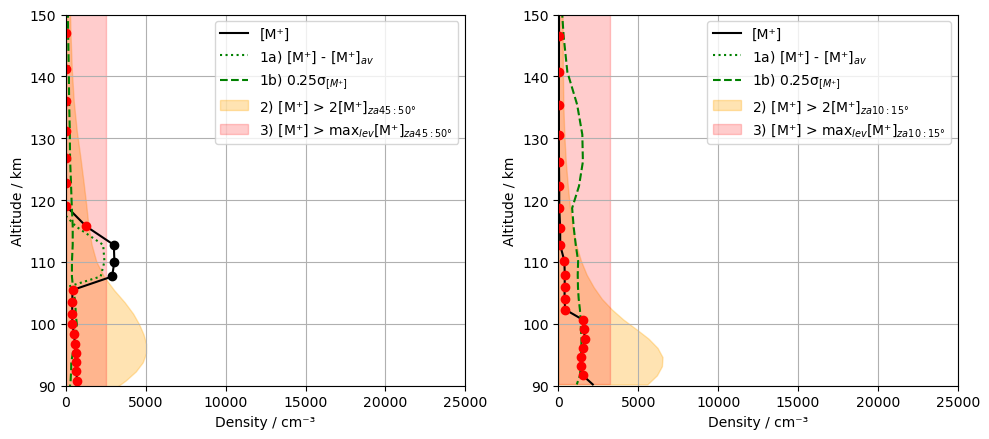

In [16]:
# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2, alt_sel2, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel2-Mptdens_nsavg_sel2), alt_sel2, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25*Mptdens_nsstd_sel2, alt_sel2, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)

axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2, 0, 2 * Mptdens_sel2, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel2)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')


for i in range(len(alt_sel2) - 1):
    if Mptdens_nsdiff_sel2[i] < 0.25*Mptdens_nsstd_sel2[i] or Mptdensns_sel2[i] < max_Mptdens_sel or Mptdensns_sel2[i] < 2 * Mptdens_sel2[i]:
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')

axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1, alt_sel1, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1-Mptdens_nsavg_sel1), alt_sel1, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25*Mptdens_nsstd_sel1, alt_sel1, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)

axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1, 0, 2 * Mptdens_sel1, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel1)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1) - 1):
    if Mptdens_nsdiff_sel1[i] < 0.25*Mptdens_nsstd_sel1[i] or Mptdensns_sel1[i] < max_Mptdens_sel or Mptdensns_sel1[i] < 2 * Mptdens_sel1[i]:
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel2.values-2.5)}-{int(intlat_sel2.values+2.5)}_and_{int(intlat_sel1.values-2.5)}-{int(intlat_sel1.values+2.5)}.png'
# plt.savefig(f'./Figures/SMax/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

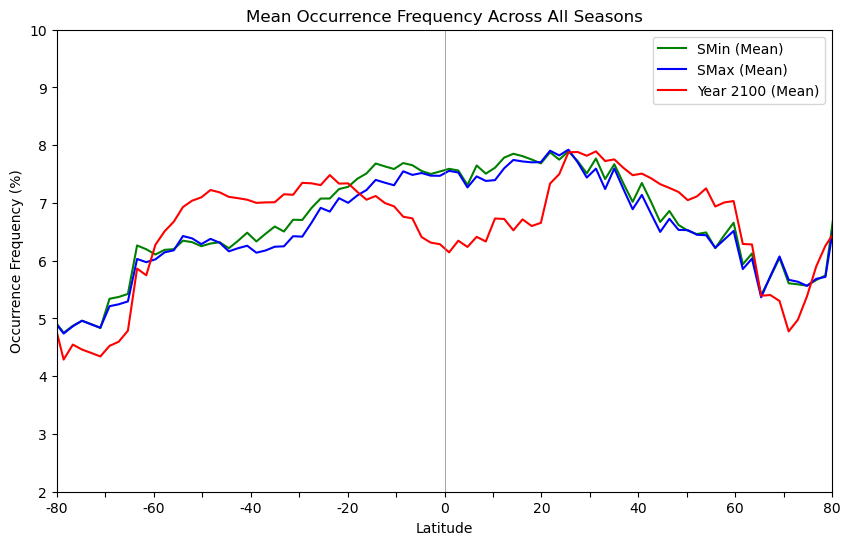

In [17]:
mean_SMin_SpEsns_Occ_Freq_lat = np.mean(
    [
        min_spr_SpEsns_Occ_Freq_lat,
        min_sum_SpEsns_Occ_Freq_lat,
        min_aut_SpEsns_Occ_Freq_lat,
        min_win_SpEsns_Occ_Freq_lat
    ], 
    axis=0
)

mean_SMax_SpEsns_Occ_Freq_lat = np.mean(
    [
        max_spr_SpEsns_Occ_Freq_lat,
        max_sum_SpEsns_Occ_Freq_lat,
        max_aut_SpEsns_Occ_Freq_lat,
        max_win_SpEsns_Occ_Freq_lat
    ], 
    axis=0
)

mean_clim_SpEsns_Occ_Freq_lat = np.mean(
    [
        cli_spr_SpEsns_Occ_Freq_lat,
        cli_sum_SpEsns_Occ_Freq_lat,
        cli_aut_SpEsns_Occ_Freq_lat,
        cli_win_SpEsns_Occ_Freq_lat
    ], 
    axis=0
)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean SMin
ax.plot(lat, mean_SMin_SpEsns_Occ_Freq_lat, color='green', linestyle='solid', label='SMin (Mean)')

# Plot mean SMax
ax.plot(lat, mean_SMax_SpEsns_Occ_Freq_lat, color='blue', linestyle='solid', label='SMax (Mean)')

# Plot mean clim
ax.plot(lat, mean_clim_SpEsns_Occ_Freq_lat, color='red', linestyle='solid', label='Year 2100 (Mean)')

# Add horizontal line at zero latitude for reference
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

# Set limits and labels
ax.set_xlim(-80, 80)
ax.set_ylim(2, 10)
ax.set_xlabel('Latitude')
ax.set_ylabel('Occurrence Frequency (%)')

# Set ticks
xticks = np.arange(-80, 81, 10)
xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# Add legend
ax.legend(loc='upper right')

# Add title
ax.set_title('Mean Occurrence Frequency Across All Seasons')

# Save or show the figure
# plt.savefig('Figures/Solar_Comp/Mean_Lat.png', dpi=400, bbox_inches='tight')
plt.show()

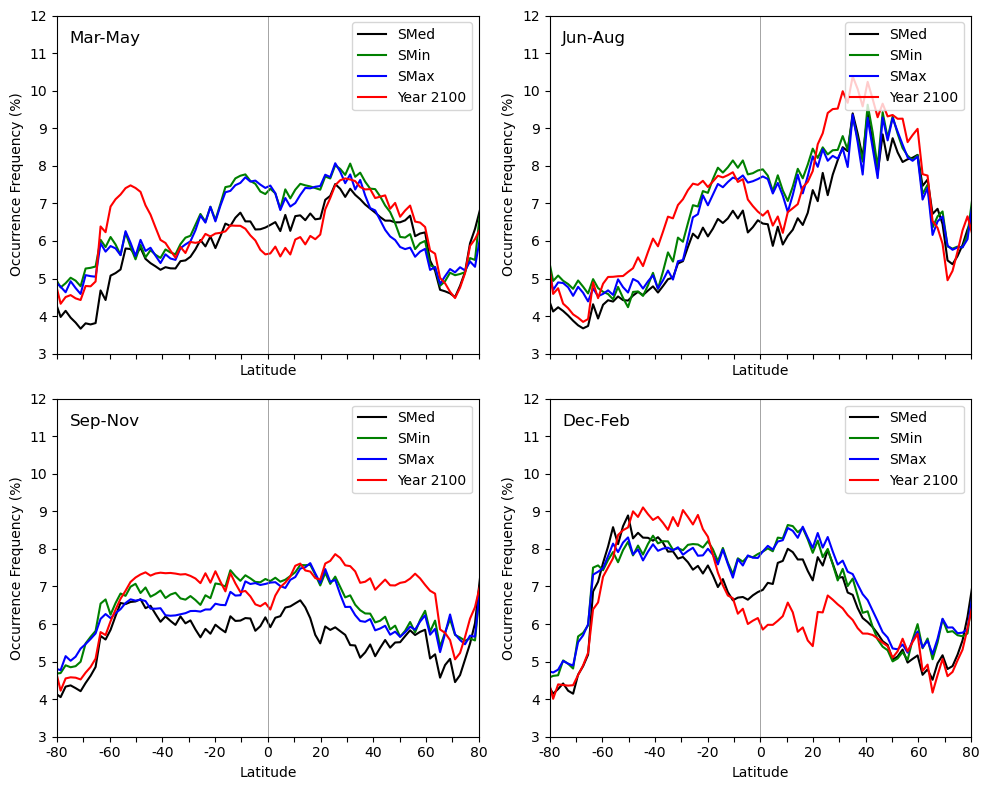

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data - SMed
axes[0, 0].plot(lat, med_spr_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[0, 1].plot(lat, med_sum_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[1, 0].plot(lat, med_aut_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')
axes[1, 1].plot(lat, med_win_SpEsns_Occ_Freq_lat , color='black', linestyle='solid', label='SMed')

# Plot WACCM data - SMin
axes[0, 0].plot(lat, min_spr_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[0, 1].plot(lat, min_sum_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[1, 0].plot(lat, min_aut_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')
axes[1, 1].plot(lat, min_win_SpEsns_Occ_Freq_lat , color='green', linestyle='solid', label='SMin')

# Plot WACCM data - SMax
axes[0, 0].plot(lat, max_spr_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[0, 1].plot(lat, max_sum_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[1, 0].plot(lat, max_aut_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')
axes[1, 1].plot(lat, max_win_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='SMax')


# Plot WACCM data - CliC
axes[0, 0].plot(lat, cli_spr_SpEsns_Occ_Freq_lat, color='red', label='Year 2100')
axes[0, 1].plot(lat, cli_sum_SpEsns_Occ_Freq_lat, color='red', label='Year 2100')
axes[1, 0].plot(lat, cli_aut_SpEsns_Occ_Freq_lat, color='red', label='Year 2100')
axes[1, 1].plot(lat, cli_win_SpEsns_Occ_Freq_lat, color='red', label='Year 2100')

# # Plot COSMIC data with shaded error area
# axes[0, 0].plot(lat_spr_lon, ocfr_spr_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
# axes[0, 1].plot(lat_sum_lon, ocfr_sum_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
# axes[1, 0].plot(lat_aut_lon, ocfr_aut_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
# axes[1, 1].plot(lat_win_lon, ocfr_win_lon_mean /factor, color='red', label=f'COSMIC/{factor}')

# # # Fill between upper and lower bounds of the error
# axes[0, 0].fill_between(lat_spr_lon, (ocfr_spr_lon_mean.values - spr_stdev_lat.values) / factor, (ocfr_spr_lon_mean.values + spr_stdev_lat.values) / factor, color='red', alpha=0.3)
# axes[0, 1].fill_between(lat_sum_lon, (ocfr_sum_lon_mean.values - sum_stdev_lat.values) / factor, (ocfr_sum_lon_mean.values + sum_stdev_lat.values) / factor, color='red', alpha=0.3)
# axes[1, 0].fill_between(lat_aut_lon, (ocfr_aut_lon_mean.values - aut_stdev_lat.values) / factor, (ocfr_aut_lon_mean.values + aut_stdev_lat.values) / factor, color='red', alpha=0.3)
# axes[1, 1].fill_between(lat_win_lon, (ocfr_win_lon_mean.values - win_stdev_lat.values) / factor, (ocfr_win_lon_mean.values + win_stdev_lat.values) / factor, color='red', alpha=0.3)


ylim_min = 3
ylim_max = 12


for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()
    ax.set_ylim(ylim_min, ylim_max)

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')
        
plt.tight_layout()

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Lat_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Lat_f-{factor}.png'
    
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


### NEW FIVEDEGREEBINS SWITCH

In [19]:
fivedegbins = 1

## Lat - Lon

In [20]:
# Define the MidpointNormalize class for diverging colorbar normalization
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work their way either side from a prescribed midpoint value.
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

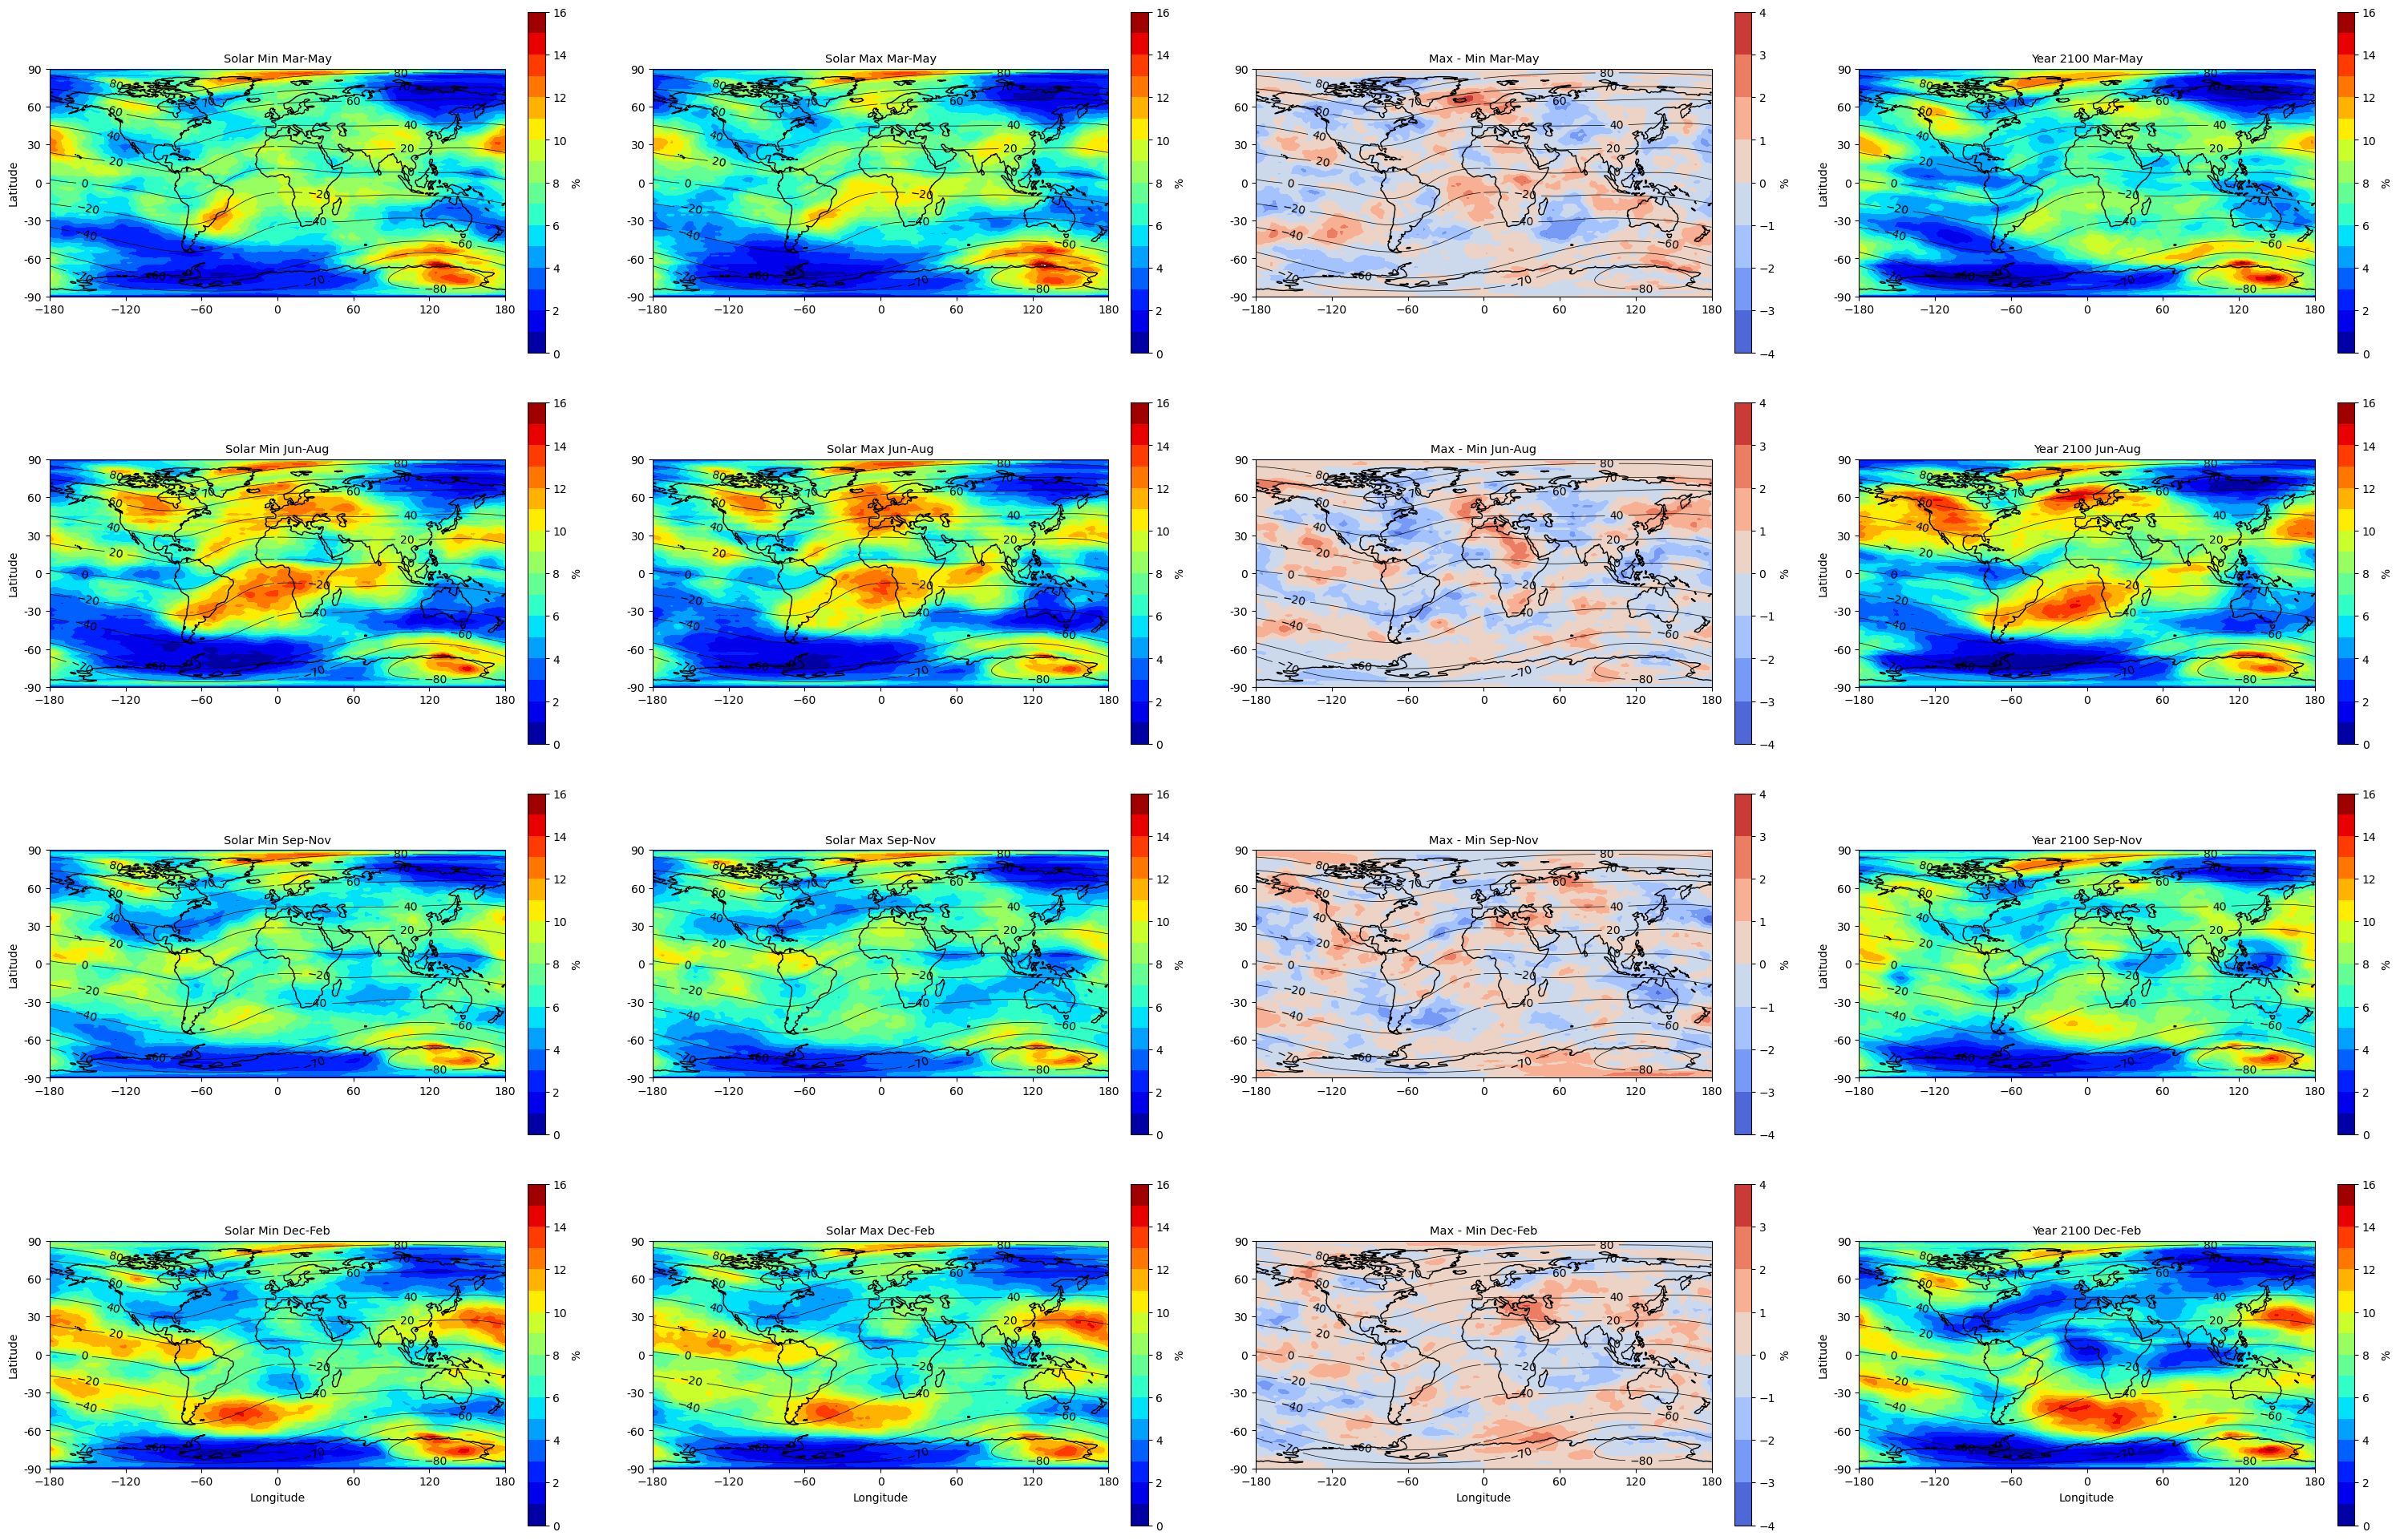

In [21]:
# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(32, 22),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

cmap = plt.get_cmap('jet')

# Data for plotting
min_subplots = [min_spr_SpEsns_Occ_Freq_llav, min_sum_SpEsns_Occ_Freq_llav,
                min_aut_SpEsns_Occ_Freq_llav, min_win_SpEsns_Occ_Freq_llav]

max_subplots = [max_spr_SpEsns_Occ_Freq_llav, max_sum_SpEsns_Occ_Freq_llav,
                max_aut_SpEsns_Occ_Freq_llav, max_win_SpEsns_Occ_Freq_llav]

cli_subplots = [cli_spr_SpEsns_Occ_Freq_llav, cli_sum_SpEsns_Occ_Freq_llav,
                cli_aut_SpEsns_Occ_Freq_llav, cli_win_SpEsns_Occ_Freq_llav]

titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin = 0
vmax = 16
nolevs = (vmax - vmin) + 1


for i, (min_data, max_data, cli_data) in enumerate(zip(min_subplots, max_subplots, cli_subplots)):
    row = i

    # Column 1: Min data
    ax_min = axes[row, 0]
    C_min = ax_min.contourf(lon_plot, lat, min_data, cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    # Add magnetic latitude contours
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax_min.contour(ALon, ALat, ALATM[0, :, :],  # Ensure ALATM matches your data dimensions
                   transform=ccrs.PlateCarree(),
                   colors='black',
                   levels=contour_levels,
                   linestyles='solid',
                   linewidths=0.5)

    clabels = ax_min.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_min.set_xlabel('Longitude')
    ax_min.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_min.set_ylabel('Latitude')
    ax_min.set_yticks(np.linspace(-90, 90, 7))
    ax_min.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
    
    cbar = fig.colorbar(C_min, ax=ax_min, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_min.coastlines()
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)

    # Column 2: Max data
    ax_max = axes[row, 1]
    C_max = ax_max.contourf(lon_plot, lat, max_data, cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    # Add magnetic latitude contours
    contour = ax_max.contour(ALon, ALat, ALATM[0, :, :],
                   transform=ccrs.PlateCarree(),
                   colors='black',
                   levels=contour_levels,
                   linestyles='solid',
                   linewidths=0.5)

    clabels = ax_max.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_max.set_xlabel('Longitude')
    ax_max.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_max.set_yticks(np.linspace(-90, 90, 7))
    ax_max.set_yticklabels([])  # Remove y-tick labels for middle column
    
    cbar = fig.colorbar(C_max, ax=ax_max, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_max.coastlines()
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

    # Column 3: % Difference (Max - Min)  with diverging colormap
    vmindiff = -4
    vmaxdiff = 4
    nolevsdiff = 9
    
    ax_diff = axes[row, 2]
    diff = (max_data - min_data) 
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    cmap_diff = plt.get_cmap('coolwarm')  # Choose a diverging colormap

    C_diff = ax_diff.contourf(lon_plot, lat, diff, cmap=cmap_diff,
                              levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff), norm=norm
                             )

    # Add magnetic latitude contours
    contour = ax_diff.contour(ALon, ALat, ALATM[0, :, :],
                    transform=ccrs.PlateCarree(),
                    colors='black',
                    levels=contour_levels,
                    linestyles='solid',
                    linewidths=0.5)

    clabels = ax_diff.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_diff.set_xlabel('Longitude')
        
    ax_diff.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_diff.set_yticks(np.linspace(-90, 90, 7))
    #ax_diff.set_yticklabels([])  # Remove y-tick labels for right column
    
    cbar = fig.colorbar(C_diff, ax=ax_diff, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_diff.coastlines()
    ax_diff.set_title(f'Max - Min {titles[i]}', fontsize=10.5)

# Column 4: Year 2100 data
    ax_cli = axes[row, 3]
    C_cli = ax_cli.contourf(lon_plot, lat, cli_data, cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    # Add magnetic latitude contours
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax_cli.contour(ALon, ALat, ALATM[0, :, :],  # Ensure ALATM matches your data dimensions
                   transform=ccrs.PlateCarree(),
                   colors='black',
                   levels=contour_levels,
                   linestyles='solid',
                   linewidths=0.5)

    clabels = ax_cli.clabel(contour, inline=True, fontsize=10)
    
    if row == 3:
        ax_cli.set_xlabel('Longitude')
    
    ax_cli.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
    
    cbar = fig.colorbar(C_cli, ax=ax_cli, pad=0.04, shrink=0.8)
    cbar.set_label(r'%')
    ax_cli.coastlines()
    ax_cli.set_title(f'Year 2100 {titles[i]}', fontsize=10.5)





plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_LatLon_diff.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


## Lat - LT

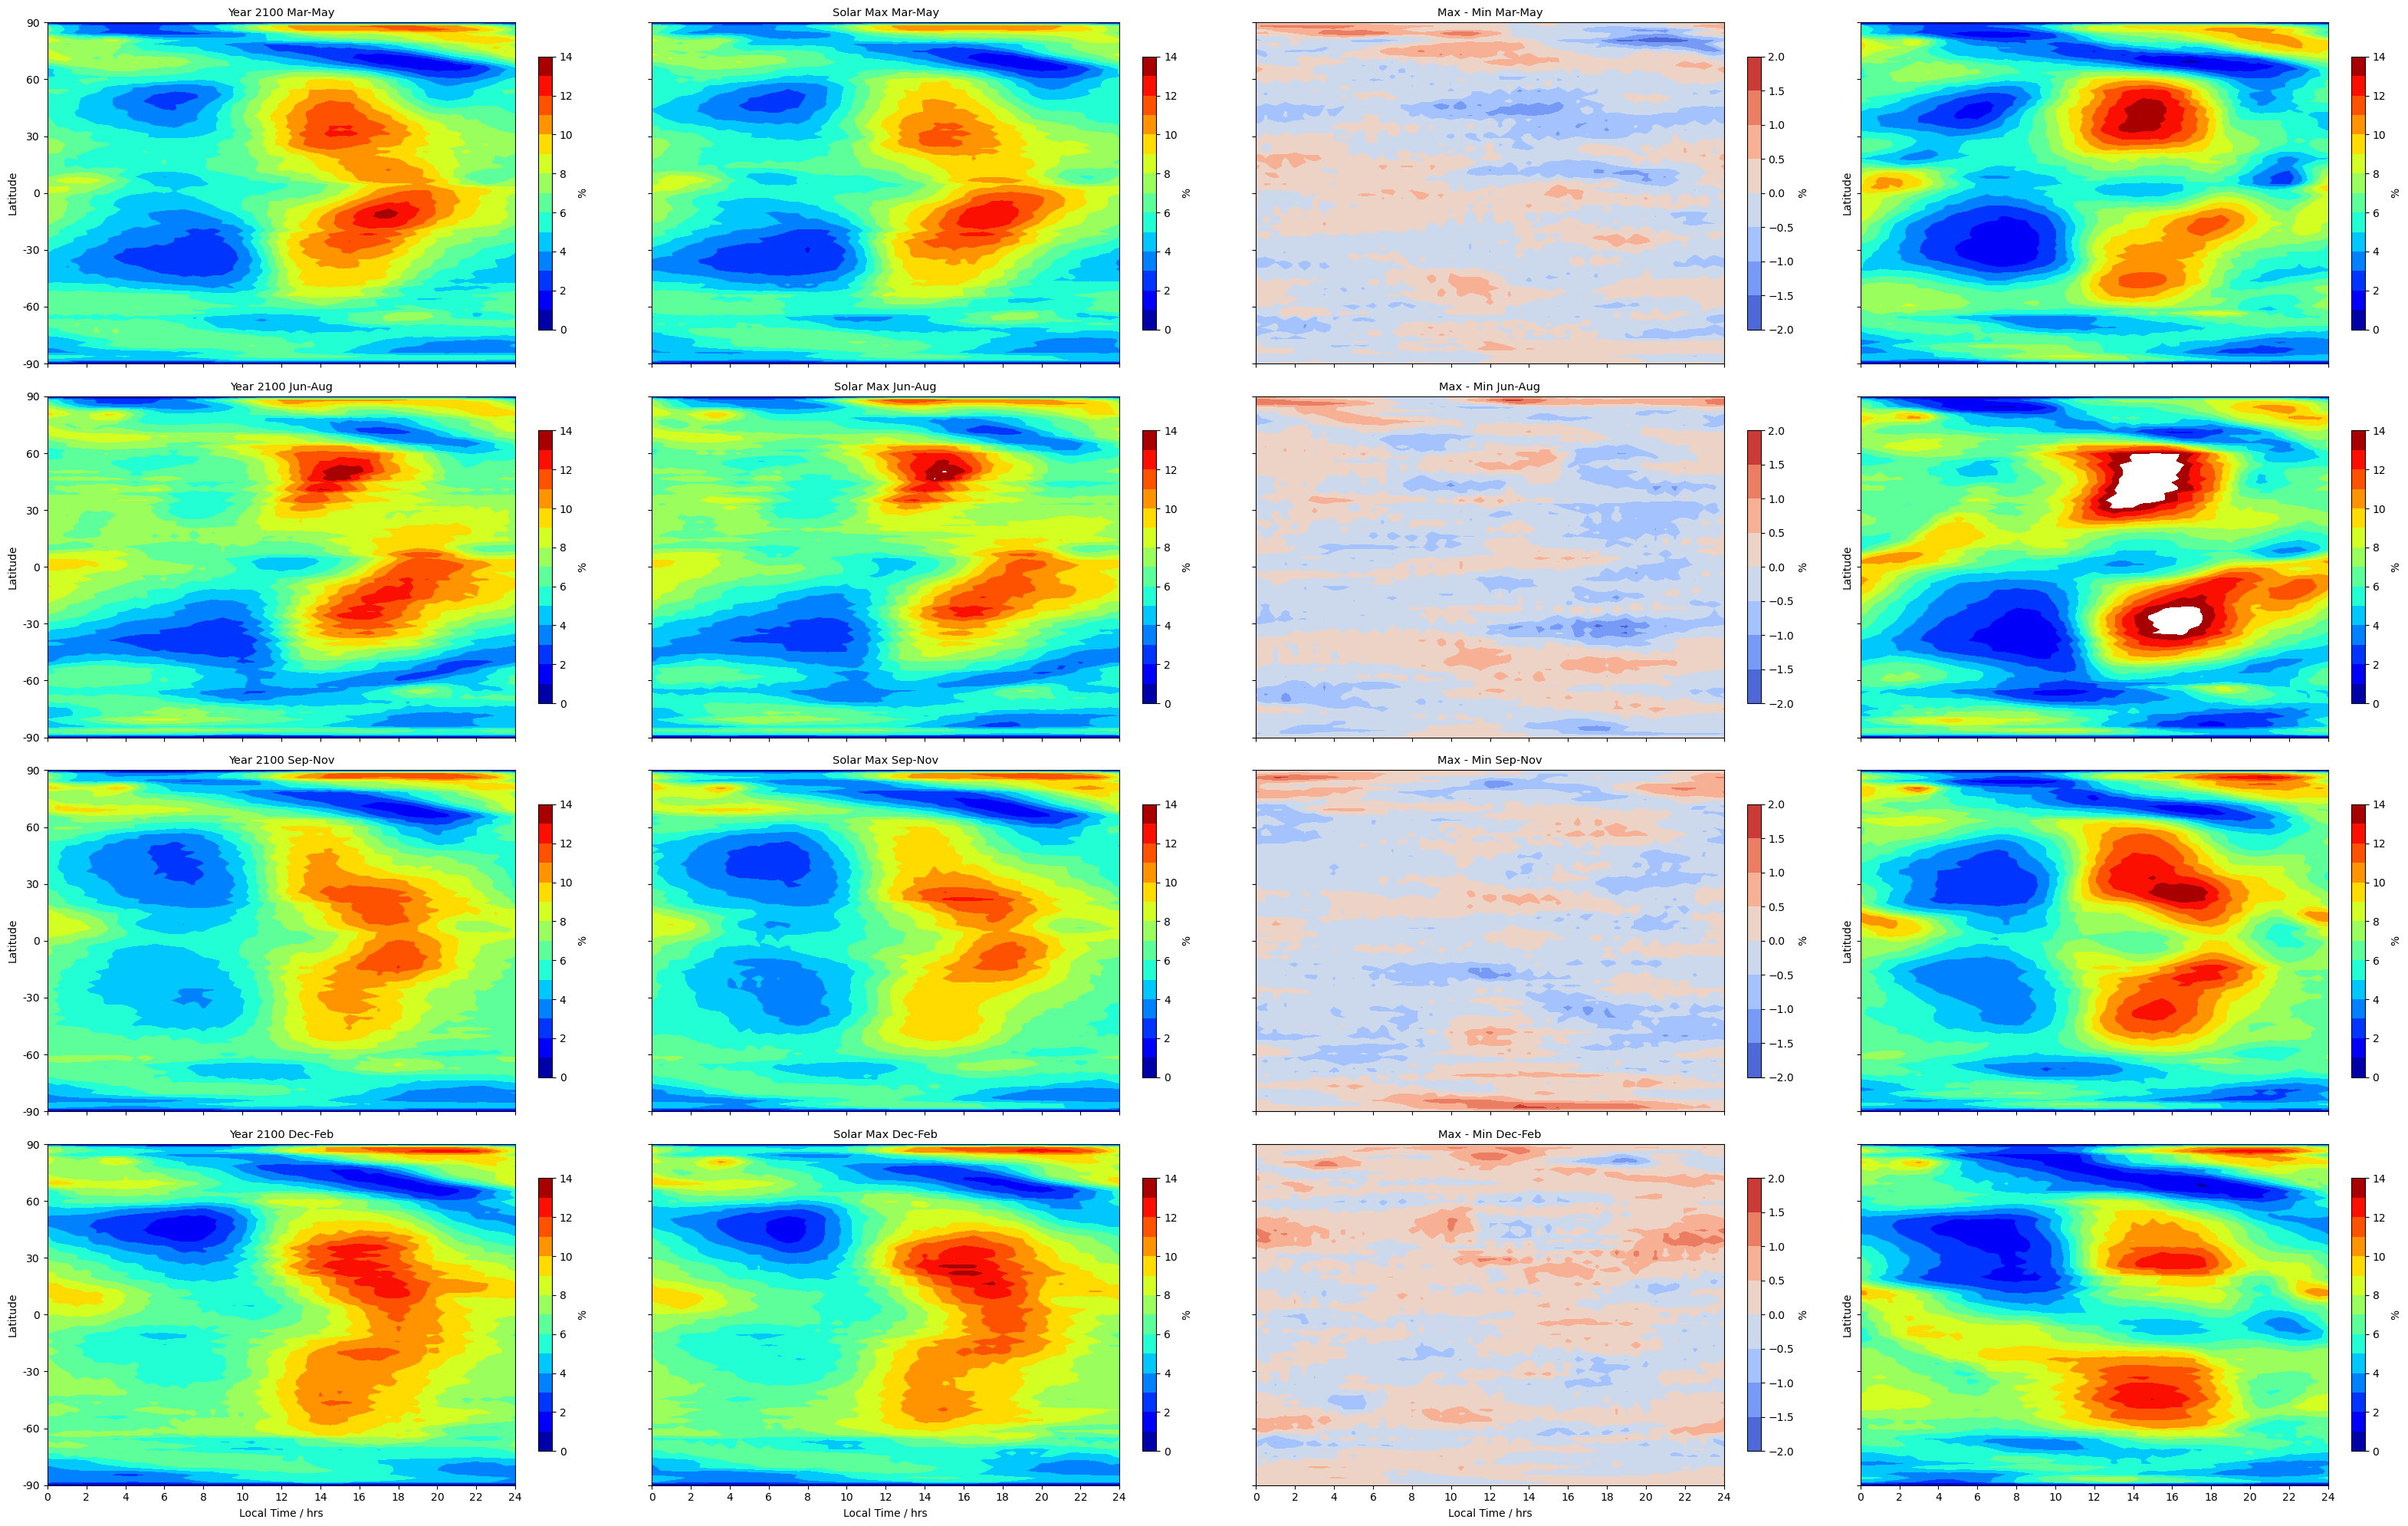

In [22]:
timeplot = np.linspace(0, 24, 49)
# Define the new data arrays for min, max, and percentage difference
min_subplots = [min_spr_SpEs_Occ_Freq_llbav, min_sum_SpEs_Occ_Freq_llbav, min_aut_SpEs_Occ_Freq_llbav, min_win_SpEs_Occ_Freq_llbav]
max_subplots = [max_spr_SpEs_Occ_Freq_llbav, max_sum_SpEs_Occ_Freq_llbav, max_aut_SpEs_Occ_Freq_llbav, max_win_SpEs_Occ_Freq_llbav]
cli_subplots = [cli_spr_SpEs_Occ_Freq_llbav, cli_sum_SpEs_Occ_Freq_llbav, cli_aut_SpEs_Occ_Freq_llbav, cli_win_SpEs_Occ_Freq_llbav]

# Define the percentage difference as (max - min) / min * 100
diff_subplots = [(max_data - min_data) for max_data, min_data in zip(max_subplots, min_subplots)]

titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin = 0
vmax = 14
nolevs = (vmax - vmin) + 1
cmap = plt.get_cmap('jet')

fig_combined, axes_combined = plt.subplots(nrows=4, ncols=4, figsize=(32, 20),
                                           sharex=True, sharey=True)

for i, (min_data, max_data, diff_data, cli_data) in enumerate(zip(min_subplots, max_subplots, diff_subplots, cli_subplots)):
    row = i

    # Column 1: Min data
    ax_min = axes_combined[row, 0]
    C_min = ax_min.contourf(timeplot, lat, np.concatenate((min_data, min_data[:, :1]), axis=1), cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    if row == 3:
        ax_min.set_xlabel('Local Time / hrs')
    ax_min.set_xticks(np.linspace(0, 24, 13))
    ax_min.set_ylabel('Latitude')
    ax_min.set_yticks(np.linspace(-90, 90, 7))
    ax_min.set_yticklabels([-90, -60, -30, 0, 30, 60, 90])
    
    cbar_min = fig_combined.colorbar(C_min, ax=ax_min, pad=0.04, shrink=0.8)
    cbar_min.set_label(r'%')
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)

    # Column 2: Max data
    ax_max = axes_combined[row, 1]
    C_max = ax_max.contourf(timeplot, lat, np.concatenate((max_data, max_data[:, :1]), axis=1), cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax
                           )

    if row == 3:
        ax_max.set_xlabel('Local Time / hrs')
    ax_max.set_xticks(np.linspace(0, 24, 13))
    ax_max.set_yticks(np.linspace(-90, 90, 7))
    ax_max.set_yticklabels([])  # Remove y-tick labels for middle column
    
    cbar_max = fig_combined.colorbar(C_max, ax=ax_max, pad=0.04, shrink=0.8)
    cbar_max.set_label(r'%')
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

    # Column 3: Difference (Max - Min) 
    
    vmindiff = -2
    vmaxdiff = 2
    nolevsdiff = 9
    
    ax_diff = axes_combined[row, 2]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff, vmax=vmaxdiff)
    C_diff = ax_diff.contourf(timeplot, lat, np.concatenate((diff_data, diff_data[:, :1]), axis=1), cmap='coolwarm' 
                              ,levels=np.linspace(vmindiff, vmaxdiff, nolevsdiff)
                              , norm=norm)

    if row == 3:
        ax_diff.set_xlabel('Local Time / hrs')
    ax_diff.set_xticks(np.linspace(0, 24, 13))
    ax_diff.set_yticks(np.linspace(-90, 90, 7))
    ax_diff.set_yticklabels([])  # Remove y-tick labels for right column
    
    cbar_diff = fig_combined.colorbar(C_diff, ax=ax_diff, pad=0.04, shrink=0.8)
    cbar_diff.set_label(r'%')
    ax_diff.set_title(f'Max - Min {titles[i]}', fontsize=10.5)

 # Column 4: Year 2100 data
    ax_cli = axes_combined[row, 3]
    C_cli = ax_cli.contourf(timeplot, lat, np.concatenate((cli_data, cli_data[:, :1]), axis=1), cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

    if row == 3:
        ax_min.set_xlabel('Local Time / hrs')
    ax_cli.set_xticks(np.linspace(0, 24, 13))
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels([-90, -60, -30, 0, 30, 60, 90])
    
    cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04, shrink=0.8)
    cbar_cli.set_label(r'%')
    ax_min.set_title(f'Year 2100 {titles[i]}', fontsize=10.5)

plt.tight_layout()

figname = f'{run_name}_LatLT_diff.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


## Alt - Lat

### Normalised Occurence Freq.

In [23]:
# Create DataArrays with the 'season' coordinate
SpEs_spr_alt_lat_med = xr.DataArray(SpEs_spr_alt_lat_med, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_med = xr.DataArray(SpEs_sum_alt_lat_med, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_med = xr.DataArray(SpEs_aut_alt_lat_med, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_med = xr.DataArray(SpEs_win_alt_lat_med, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

SpEs_spr_alt_lat_min = xr.DataArray(SpEs_spr_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_min = xr.DataArray(SpEs_sum_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_min = xr.DataArray(SpEs_aut_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_min = xr.DataArray(SpEs_win_alt_lat_min, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

SpEs_spr_alt_lat_max = xr.DataArray(SpEs_spr_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_max = xr.DataArray(SpEs_sum_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_max = xr.DataArray(SpEs_aut_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_max = xr.DataArray(SpEs_win_alt_lat_max, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

SpEs_spr_alt_lat_cli = xr.DataArray(SpEs_spr_alt_lat_cli, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat_cli = xr.DataArray(SpEs_sum_alt_lat_cli, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat_cli = xr.DataArray(SpEs_aut_alt_lat_cli, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat_cli = xr.DataArray(SpEs_win_alt_lat_cli, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

# Concatenate all datasets along the 'season' dimension
combined_all = xr.concat([
    SpEs_spr_alt_lat_med, SpEs_sum_alt_lat_med, SpEs_aut_alt_lat_med, SpEs_win_alt_lat_med,
    SpEs_spr_alt_lat_min, SpEs_sum_alt_lat_min, SpEs_aut_alt_lat_min, SpEs_win_alt_lat_min,
    SpEs_spr_alt_lat_max, SpEs_sum_alt_lat_max, SpEs_aut_alt_lat_max, SpEs_win_alt_lat_max,
    SpEs_spr_alt_lat_cli, SpEs_sum_alt_lat_cli, SpEs_aut_alt_lat_cli, SpEs_win_alt_lat_cli,
], dim='season')

# Calculate the overall min and max values across all datasets
overall_min = combined_all.min(dim=['season', 'lev_sl', 'lat'])
overall_max = combined_all.max(dim=['season', 'lev_sl', 'lat'])

# Normalize each season's data using the overall min and max values

# Solar Med
SpEs_spr_alt_lat_med_norm = (SpEs_spr_alt_lat_med - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_med_norm = (SpEs_sum_alt_lat_med - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_med_norm = (SpEs_aut_alt_lat_med - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_med_norm = (SpEs_win_alt_lat_med - overall_min) / (overall_max - overall_min)

# Solar Min
SpEs_spr_alt_lat_min_norm = (SpEs_spr_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_min_norm = (SpEs_sum_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_min_norm = (SpEs_aut_alt_lat_min - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_min_norm = (SpEs_win_alt_lat_min - overall_min) / (overall_max - overall_min)

# Solar Max
SpEs_spr_alt_lat_max_norm = (SpEs_spr_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_max_norm = (SpEs_sum_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_max_norm = (SpEs_aut_alt_lat_max - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_max_norm = (SpEs_win_alt_lat_max - overall_min) / (overall_max - overall_min)

# Year 21000
SpEs_spr_alt_lat_cli_norm = (SpEs_spr_alt_lat_cli - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_cli_norm = (SpEs_sum_alt_lat_cli - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_cli_norm = (SpEs_aut_alt_lat_cli - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_cli_norm = (SpEs_win_alt_lat_cli - overall_min) / (overall_max - overall_min)


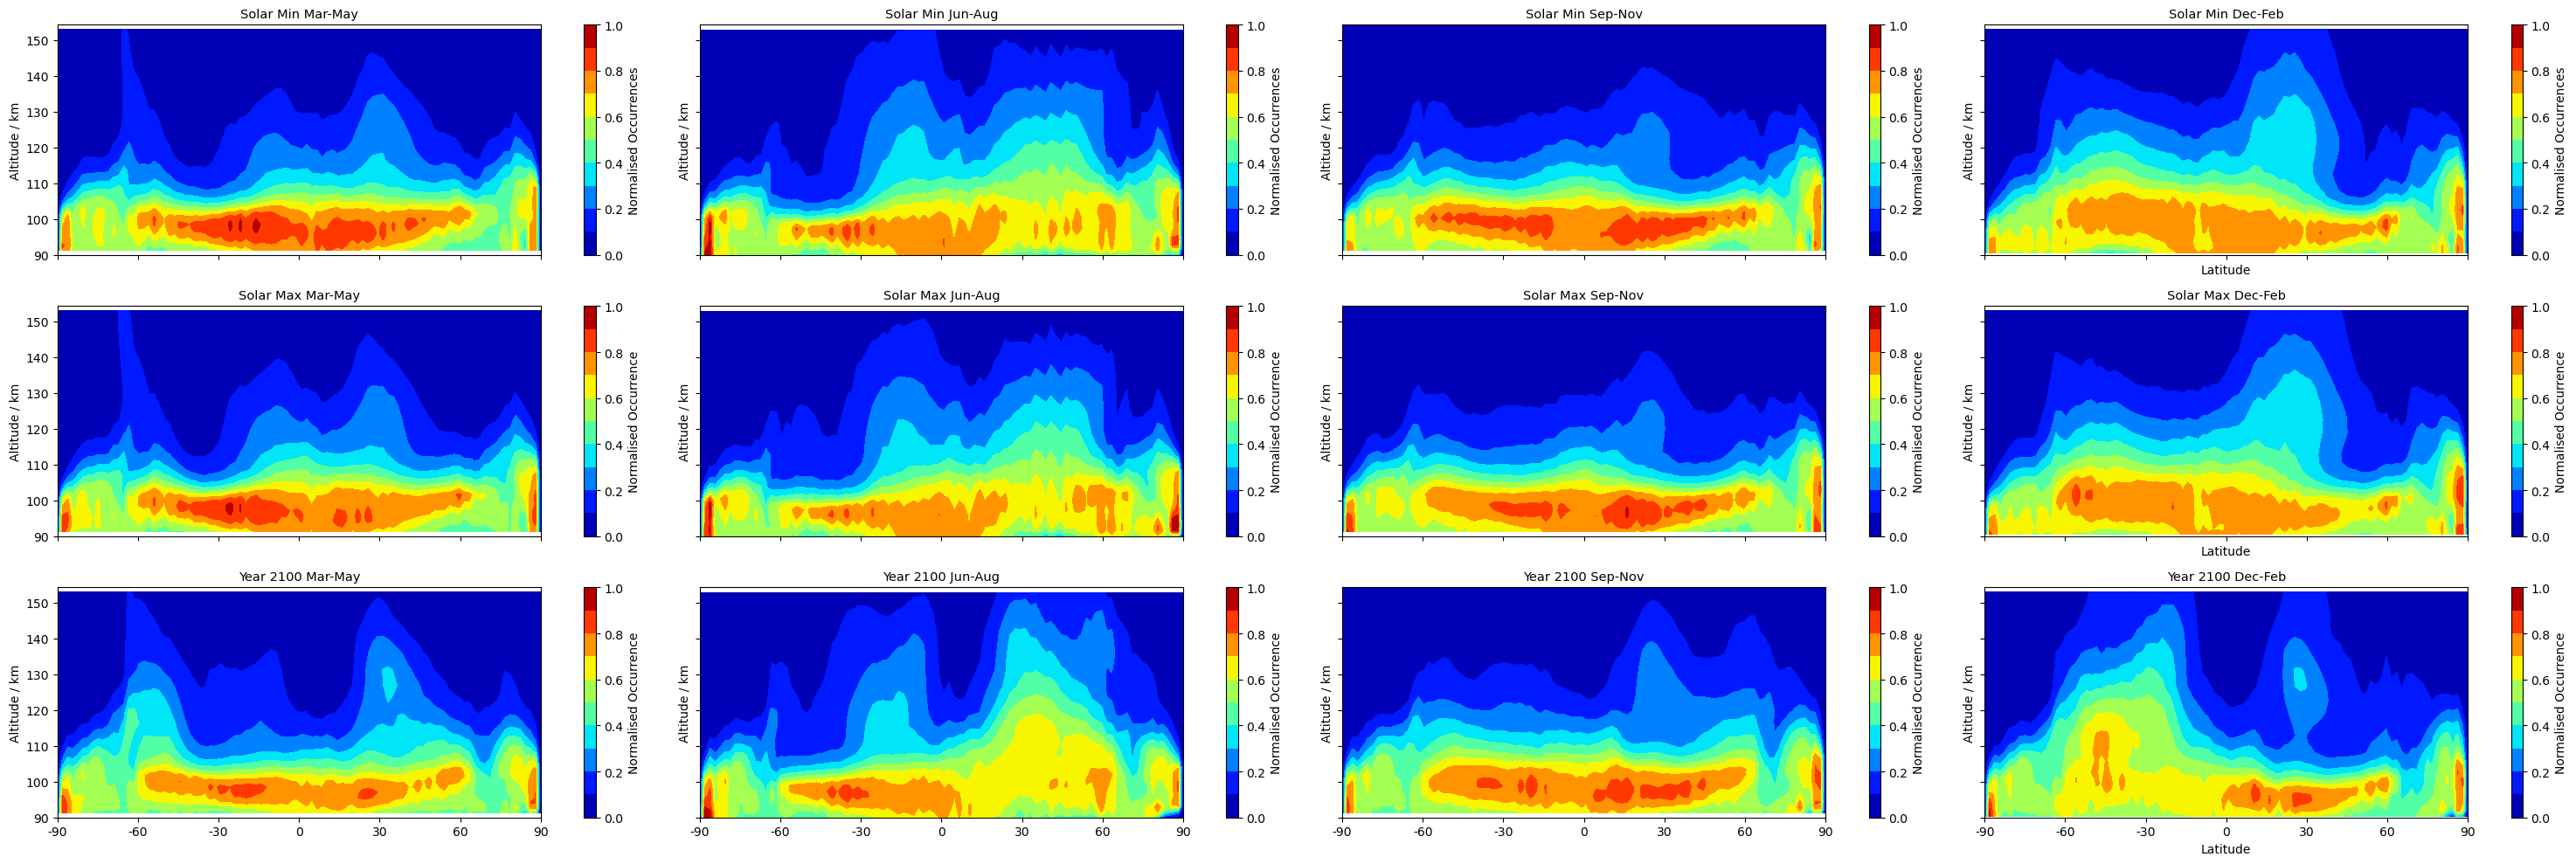

In [24]:
# Define the parameters for plotting
vmin = 0
vmax = 1
nolevs = 11

# vmindiff = -0.25
# vmaxdiff = 0.25
# nolevsdiff = 11

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30,10), sharex=True, sharey=True)

# Define the data for each plot
subplots_min = [SpEs_spr_alt_lat_min_norm, SpEs_sum_alt_lat_min_norm, SpEs_aut_alt_lat_min_norm, SpEs_win_alt_lat_min_norm]
subplots_max = [SpEs_spr_alt_lat_max_norm, SpEs_sum_alt_lat_max_norm, SpEs_aut_alt_lat_max_norm, SpEs_win_alt_lat_max_norm]
subplots_cli = [SpEs_spr_alt_lat_cli_norm, SpEs_sum_alt_lat_cli_norm, SpEs_aut_alt_lat_cli_norm, SpEs_win_alt_lat_cli_norm]


# Define the altitudes for each plot
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

# Define the titles for each plot
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Plot the data for solar min, solar max, and their difference
for i in range(4):
    # Solar Min
    ax_min = axes[0, i]
    alts_plot = alts_waccm[i]
    C_min = ax_min.contourf(lat, alts_plot, subplots_min[i], cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)
    if i == 3:
        ax_min.set_xlabel('Latitude')
        ax_min.set_xticks(np.linspace(-90, 90, 7))
        ax_min.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax_min.set_xticks([])  
    ax_min.set_ylabel('Altitude / km')
    cbar_min = fig.colorbar(C_min, ax=ax_min, pad=0.07)
    cbar_min.set_label(r'Normalised Occurrences')
    ax_min.set_title(f'Solar Min {titles[i]}', fontsize=10.5)
    
    # Solar Max
    ax_max = axes[1, i]
    C_max = ax_max.contourf(lat, alts_plot, subplots_max[i], cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)
    if i == 3:
        ax_max.set_xlabel('Latitude')
        ax_max.set_xticks(np.linspace(-90, 90, 7))
        ax_max.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax_max.set_xticks([])  
    ax_max.set_ylabel('Altitude / km')
    cbar_max = fig.colorbar(C_max, ax=ax_max, pad=0.07)
    cbar_max.set_label(r'Normalised Occurrence')
    ax_max.set_title(f'Solar Max {titles[i]}', fontsize=10.5)

    # Year 2100
    ax_cli = axes[2, i]
    C_cli = ax_cli.contourf(lat, alts_plot, subplots_cli[i], cmap=cmap,
                            levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)
    if i == 3:
        ax_cli.set_xlabel('Latitude')
        ax_cli.set_xticks(np.linspace(-90, 90, 7))
        ax_cli.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax_cli.set_xticks([])  
    ax_cli.set_ylabel('Altitude / km')
    cbar_cli = fig.colorbar(C_cli, ax=ax_cli, pad=0.07)
    cbar_cli.set_label(r'Normalised Occurrence')
    ax_cli.set_title(f'Year 2100 {titles[i]}', fontsize=10.5)

# Adjust layout and save the figure
# plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
plt.tight_layout()
figname = f'{run_name}_Diff_AltLat_norm.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


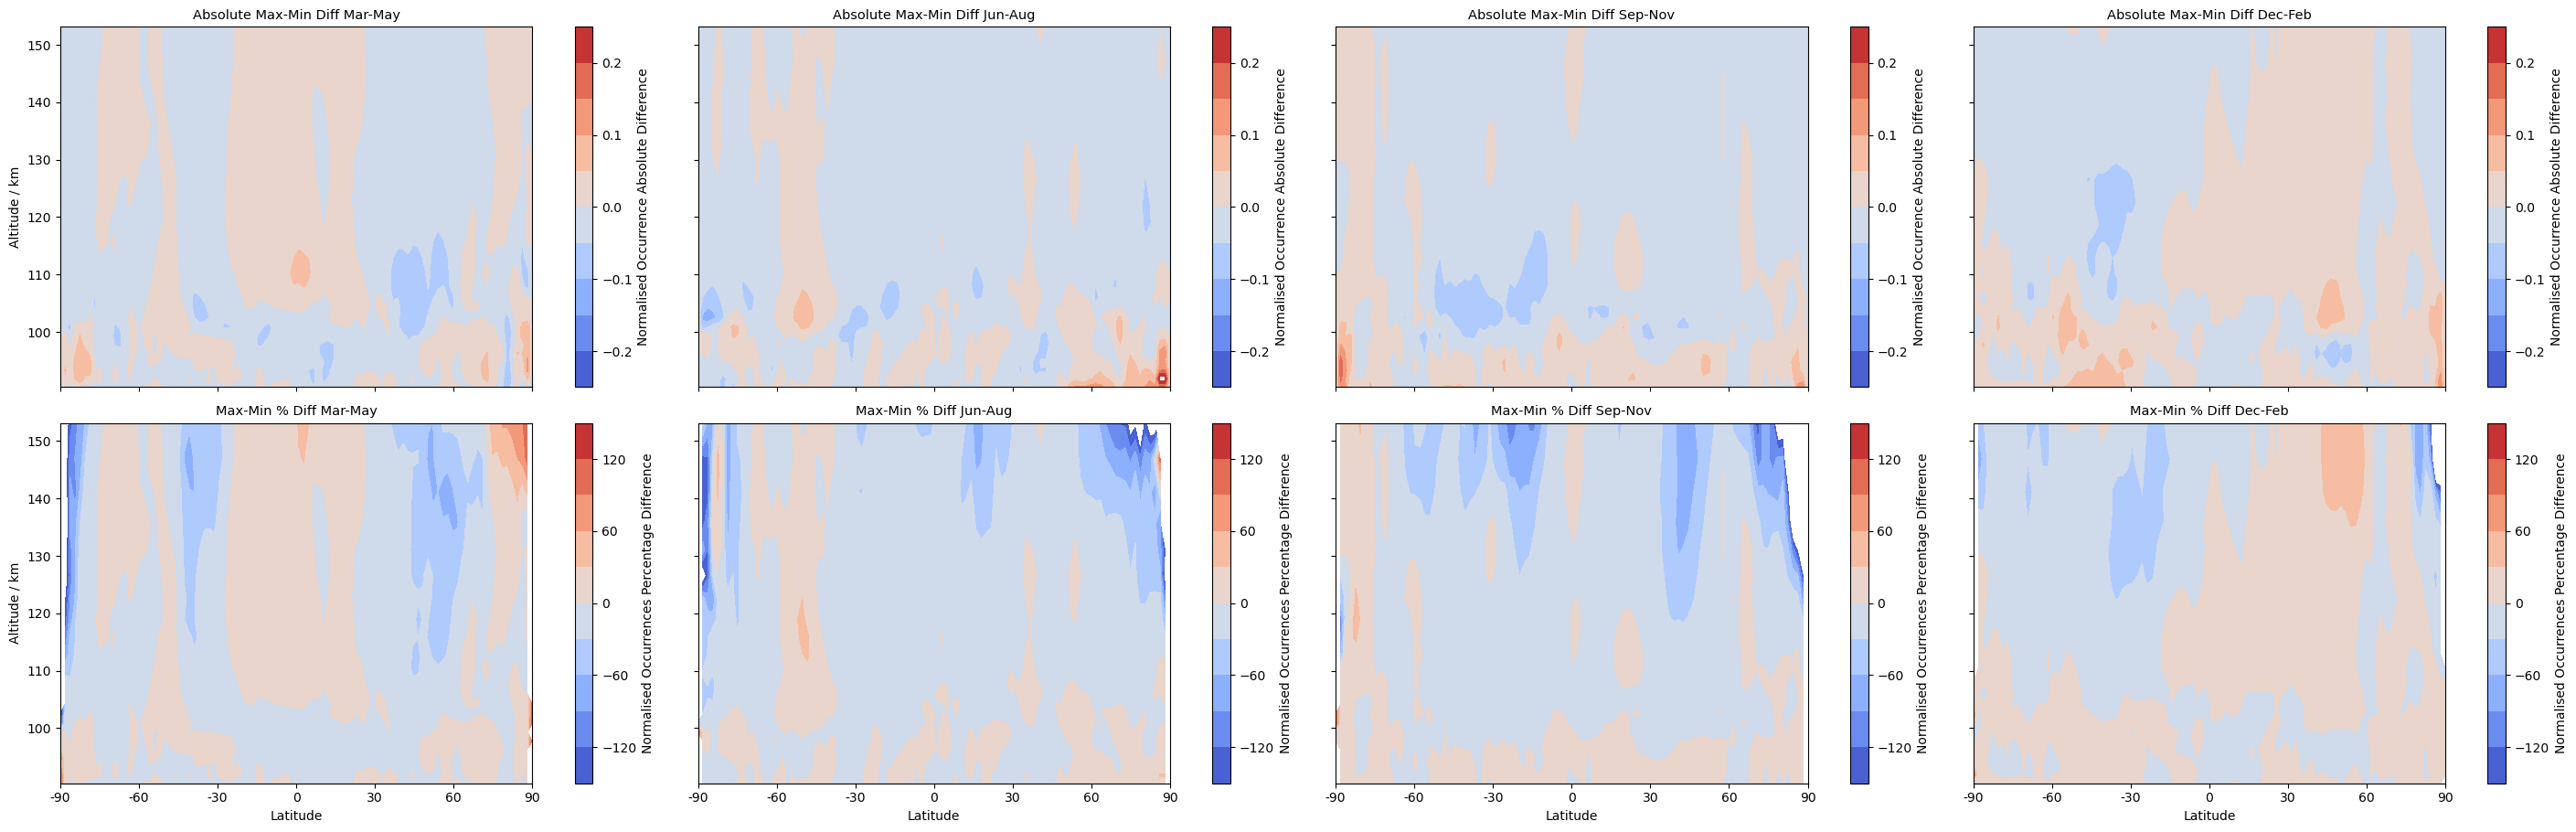

In [25]:
# Define the parameters for plotting
vmin = 0
vmax = 1
nolevs = 11

vmindiff_abs = -0.25
vmaxdiff_abs = 0.25
nolevsdiff_abs = 11


vmindiff_perc = -150  # 0.25
vmaxdiff_perc = 150   # 0.25
nolevsdiff_perc = 11

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharex=True, sharey=True)

# Define the data for each plot
subplots_diff = [(max_data - min_data) for max_data, min_data in zip(subplots_max, subplots_min)]
subplots_diff_abs = [(max_data - min_data) for max_data, min_data in zip(subplots_max, subplots_min)]
subplots_diff_perc = [((max_data - min_data) / max_data) * 100 for max_data, min_data in zip(subplots_max, subplots_min)]

# Define the altitudes for each plot
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

# Define the titles for each plot
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Plot the data for solar min, solar max, and their difference
for i in range(4):

    # if i == 0:
    #     ax_diff_perc.set_ylabel('Altitude / km') 

    # Max-Min Difference
    ax_diff_abs = axes[0, i]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff_abs, vmax=vmaxdiff_abs)
    C_diff_abs = ax_diff_abs.contourf(lat, alts_plot, subplots_diff_abs[i], cmap='coolwarm',
                              levels=np.linspace(vmindiff_abs, vmaxdiff_abs, nolevsdiff_abs), vmin=vmindiff_abs, vmax=vmaxdiff_abs,
                              norm=norm)

    if i == 0:
        ax_diff_abs.set_ylabel('Altitude / km')
    
    cbar_diff_abs = fig.colorbar(C_diff_abs, ax=ax_diff_abs, pad=0.07)
    cbar_diff_abs.set_label(r'Normalised Occurrence Absolute Difference')
    ax_diff_abs.set_title(f'Absolute Max-Min Diff {titles[i]}', fontsize=10.5)

    # Max-Min Difference Percentage
    ax_diff_perc = axes[1, i]
    norm = MidpointNormalize(midpoint=0, vmin=vmindiff_perc, vmax=vmaxdiff_perc)
    C_diff_perc = ax_diff_perc.contourf(lat, alts_plot, subplots_diff_perc[i], cmap='coolwarm',
                                              levels=np.linspace(vmindiff_perc, vmaxdiff_perc, nolevsdiff_perc), vmin=vmindiff_perc, vmax=vmaxdiff_perc,
                                              norm=norm)
    if i == 0:
        ax_diff_perc.set_ylabel('Altitude / km')

    # Assign the colorbar to the bottom row correctly
    cbar_diff_perc = fig.colorbar(C_diff_perc, ax=ax_diff_perc, pad=0.07)
    cbar_diff_perc.set_label(r'Normalised Occurrences Percentage Difference')
    ax_diff_perc.set_title(f'Max-Min % Diff {titles[i]}', fontsize=10.5)

    # Add x-axis labels only for the bottom row
    ax_diff_perc.set_xlabel('Latitude')
    ax_diff_perc.set_xticks(np.linspace(-90, 90, 7))
    ax_diff_perc.set_xticklabels([-90, -60, -30, 0, 30, 60, 90])

# Adjust layout and save the figure
plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
figname = f'{run_name}_Diff_AltLat_norm.png'
# plt.savefig(f'Figures/Solar_Comp/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


## Alt - LT (

In [27]:
tot_SpEs_spr_5deg_med

array([[[3.74444444e+01, 3.43055555e+01, 3.35833333e+01, ...,
         3.95555555e+01, 4.01388889e+01, 3.87222222e+01],
        [8.77777778e+01, 8.98055556e+01, 9.44166667e+01, ...,
         9.15555556e+01, 9.20833334e+01, 8.97222222e+01],
        [3.37777778e+01, 3.50555555e+01, 3.85000000e+01, ...,
         3.36388889e+01, 3.81944444e+01, 3.69722222e+01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[4.05833333e+01, 3.74444444e+01, 3.74444444e+01, ...,
         4.37222222e+01, 4.18611111e+01, 4.10000000e+01],
        [6.47500000e+01, 6.46666667e+01, 6.78888889e+01, ...,
         6.49444445e+01, 6.68055556e+01, 7.06666667e+01],
        [8.50000000e+00, 

In [26]:
# Latitude bands
lat_band = ['0-5','15-20', '45-50', '65-70']
solar_conditions = ['med', 'min', 'max', 'cli']

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MED
#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20 = np.where((intlat >= 15) & (intlat <= 20))[0]
ind_45_50 = np.where((intlat >= 45) & (intlat <= 50))[0]

SpEs_spr_15_20_med = np.squeeze(tot_SpEs_spr_5deg_med[:, ind_15_20, :])
SpEs_sum_15_20_med = np.squeeze(tot_SpEs_sum_5deg_med[:, ind_15_20, :])
SpEs_aut_15_20_med = np.squeeze(tot_SpEs_aut_5deg_med[:, ind_15_20, :])
SpEs_win_15_20_med = np.squeeze(tot_SpEs_win_5deg_med[:, ind_15_20, :])

SpEs_spr_45_50_med = np.squeeze(tot_SpEs_spr_5deg_med[:, ind_45_50, :])
SpEs_sum_45_50_med = np.squeeze(tot_SpEs_sum_5deg_med[:, ind_45_50, :])
SpEs_aut_45_50_med = np.squeeze(tot_SpEs_aut_5deg_med[:, ind_45_50, :])
SpEs_win_45_50_med = np.squeeze(tot_SpEs_win_5deg_med[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_med = xr.DataArray(SpEs_spr_15_20_med, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_sum_altLT_15_20_med = xr.DataArray(SpEs_sum_15_20_med, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_aut_altLT_15_20_med = xr.DataArray(SpEs_aut_15_20_med, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'med'})
SpEs_win_altLT_15_20_med = xr.DataArray(SpEs_win_15_20_med, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'med'})

SpEs_spr_altLT_45_50_med = xr.DataArray(SpEs_spr_45_50_med, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_sum_altLT_45_50_med = xr.DataArray(SpEs_sum_45_50_med, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_aut_altLT_45_50_med = xr.DataArray(SpEs_aut_45_50_med, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'med'})
SpEs_win_altLT_45_50_med = xr.DataArray(SpEs_win_45_50_med, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'med'})

combined_med_15_20 = xr.concat([SpEs_spr_altLT_15_20_med, SpEs_sum_altLT_15_20_med, SpEs_aut_altLT_15_20_med, SpEs_win_altLT_15_20_med], dim='season')
combined_med_45_50 = xr.concat([SpEs_spr_altLT_45_50_med, SpEs_sum_altLT_45_50_med, SpEs_aut_altLT_45_50_med, SpEs_win_altLT_45_50_med], dim='season')
combined_med_all = xr.concat([combined_med_15_20, combined_med_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MIN
#-------------------------------------------------------------------------------------------------------------------------------------------

SpEs_spr_15_20_min = np.squeeze(tot_SpEs_spr_5deg_min[:, ind_15_20, :])
SpEs_sum_15_20_min = np.squeeze(tot_SpEs_sum_5deg_min[:, ind_15_20, :])
SpEs_aut_15_20_min = np.squeeze(tot_SpEs_aut_5deg_min[:, ind_15_20, :])
SpEs_win_15_20_min = np.squeeze(tot_SpEs_win_5deg_min[:, ind_15_20, :])

SpEs_spr_45_50_min = np.squeeze(tot_SpEs_spr_5deg_min[:, ind_45_50, :])
SpEs_sum_45_50_min = np.squeeze(tot_SpEs_sum_5deg_min[:, ind_45_50, :])
SpEs_aut_45_50_min = np.squeeze(tot_SpEs_aut_5deg_min[:, ind_45_50, :])
SpEs_win_45_50_min = np.squeeze(tot_SpEs_win_5deg_min[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_min = xr.DataArray(SpEs_spr_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_sum_altLT_15_20_min = xr.DataArray(SpEs_sum_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_aut_altLT_15_20_min = xr.DataArray(SpEs_aut_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'min'})
SpEs_win_altLT_15_20_min = xr.DataArray(SpEs_win_15_20_min, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'min'})

SpEs_spr_altLT_45_50_min = xr.DataArray(SpEs_spr_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_sum_altLT_45_50_min = xr.DataArray(SpEs_sum_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_aut_altLT_45_50_min = xr.DataArray(SpEs_aut_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'min'})
SpEs_win_altLT_45_50_min = xr.DataArray(SpEs_win_45_50_min, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'min'})

combined_min_15_20 = xr.concat([SpEs_spr_altLT_15_20_min, SpEs_sum_altLT_15_20_min, SpEs_aut_altLT_15_20_min, SpEs_win_altLT_15_20_min], dim='season')
combined_min_45_50 = xr.concat([SpEs_spr_altLT_45_50_min, SpEs_sum_altLT_45_50_min, SpEs_aut_altLT_45_50_min, SpEs_win_altLT_45_50_min], dim='season')
combined_min_all = xr.concat([combined_min_15_20, combined_min_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# SOLAR MAX
#-------------------------------------------------------------------------------------------------------------------------------------------

SpEs_spr_15_20_max = np.squeeze(tot_SpEs_spr_5deg_max[:, ind_15_20, :])
SpEs_sum_15_20_max = np.squeeze(tot_SpEs_sum_5deg_max[:, ind_15_20, :])
SpEs_aut_15_20_max = np.squeeze(tot_SpEs_aut_5deg_max[:, ind_15_20, :])
SpEs_win_15_20_max = np.squeeze(tot_SpEs_win_5deg_max[:, ind_15_20, :])

SpEs_spr_45_50_max = np.squeeze(tot_SpEs_spr_5deg_max[:, ind_45_50, :])
SpEs_sum_45_50_max = np.squeeze(tot_SpEs_sum_5deg_max[:, ind_45_50, :])
SpEs_aut_45_50_max = np.squeeze(tot_SpEs_aut_5deg_max[:, ind_45_50, :])
SpEs_win_45_50_max = np.squeeze(tot_SpEs_win_5deg_max[:, ind_45_50, :])

# Create DataArrays with the 'season', 'lat_band', and 'solar_condition' coordinates
SpEs_spr_altLT_15_20_max = xr.DataArray(SpEs_spr_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_sum_altLT_15_20_max = xr.DataArray(SpEs_sum_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_aut_altLT_15_20_max = xr.DataArray(SpEs_aut_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '15-20', 'solar_condition': 'max'})
SpEs_win_altLT_15_20_max = xr.DataArray(SpEs_win_15_20_max, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '15-20', 'solar_condition': 'max'})

SpEs_spr_altLT_45_50_max = xr.DataArray(SpEs_spr_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'spring', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_sum_altLT_45_50_max = xr.DataArray(SpEs_sum_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'summer', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_aut_altLT_45_50_max = xr.DataArray(SpEs_aut_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'autumn', 'lat_band': '45-50', 'solar_condition': 'max'})
SpEs_win_altLT_45_50_max = xr.DataArray(SpEs_win_45_50_max, dims=('lev_sl', 'LT'), coords={'season': 'winter', 'lat_band': '45-50', 'solar_condition': 'max'})

combined_max_15_20 = xr.concat([SpEs_spr_altLT_15_20_max, SpEs_sum_altLT_15_20_max, SpEs_aut_altLT_15_20_max, SpEs_win_altLT_15_20_max], dim='season')
combined_max_45_50 = xr.concat([SpEs_spr_altLT_45_50_max, SpEs_sum_altLT_45_50_max, SpEs_aut_altLT_45_50_max, SpEs_win_altLT_45_50_max], dim='season')
combined_max_all = xr.concat([combined_max_15_20, combined_max_45_50], dim='lat_band')

#-------------------------------------------------------------------------------------------------------------------------------------------
# Normalisation
#-------------------------------------------------------------------------------------------------------------------------------------------
# Concatenate all solar conditions
combined_all = xr.concat([combined_med_all, combined_min_all, combined_max_all], dim='solar_condition')

# Normalise Data by Min-Max
overall_min_all = combined_all.min(dim=['season', 'lat_band', 'solar_condition', 'lev_sl', 'LT'])
overall_max_all = combined_all.max(dim=['season', 'lat_band', 'solar_condition', 'lev_sl', 'LT'])

# Normalise each solar condition
SpEs_spr_altLT_15_20_med_norm = (SpEs_spr_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_med_norm = (SpEs_sum_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_med_norm = (SpEs_aut_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_med_norm = (SpEs_win_altLT_15_20_med - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_med_norm = (SpEs_spr_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_med_norm = (SpEs_sum_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_med_norm = (SpEs_aut_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_med_norm = (SpEs_win_altLT_45_50_med - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_15_20_min_norm = (SpEs_spr_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_min_norm = (SpEs_sum_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_min_norm = (SpEs_aut_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_min_norm = (SpEs_win_altLT_15_20_min - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_min_norm = (SpEs_spr_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_min_norm = (SpEs_sum_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_min_norm = (SpEs_aut_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_min_norm = (SpEs_win_altLT_45_50_min - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_15_20_max_norm = (SpEs_spr_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_max_norm = (SpEs_sum_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_max_norm = (SpEs_aut_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_max_norm = (SpEs_win_altLT_15_20_max - overall_min_all) / (overall_max_all - overall_min_all)

SpEs_spr_altLT_45_50_max_norm = (SpEs_spr_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_45_50_max_norm = (SpEs_sum_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_45_50_max_norm = (SpEs_aut_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_45_50_max_norm = (SpEs_win_altLT_45_50_max - overall_min_all) / (overall_max_all - overall_min_all)


In [ ]:

# Define a function to plot contour data
def plot_contour(ax, levdata, data, levels, cmap, title, cbar_label, cmap_diff=None, vmin=None, vmax=None, nolevsdiff=None):
    if cmap_diff:
        norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)  # Center colormap at zero
        contour = ax.contourf(LT_L, levdata, data, levels=np.linspace(vmin, vmax, nolevsdiff)
                              , cmap='coolwarm', norm=norm)
    else:
        contour = ax.contourf(LT_L, levdata, data, levels=levels, cmap=cmap)
        
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
    cbar.set_label(cbar_label)
    ax.set_title(title)
    ax.set_xlabel('Local Time / hrs')
    ax.set_ylabel('Altitude / km')
    ax.set_ylim(92,150)
    
    xticks = np.linspace(0, 24, 13)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.astype(int))
    
    ax.grid(True, linestyle='--')
    
    linew = 0.8
    colorr = '#d3d3d3'
    
    # Add vertical lines at x=6, 12, 18
    ax.axvline(6, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(12, color=colorr, linestyle='-', linewidth=linew)
    ax.axvline(18, color=colorr, linestyle='-', linewidth=linew)
    
    # Add horizontal lines at y=100, 120, 140
    ax.axhline(100, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(120, color=colorr, linestyle='-', linewidth=linew)
    ax.axhline(140, color=colorr, linestyle='-', linewidth=linew)
    

# Parameters for the plots
cmap = 'jet'
cmap_diff = 'coolwarm'
vmin = 0
vmax = 1
nolevs = 11
levels = np.linspace(vmin, vmax, nolevs)  # 10 contour levels

# Parameters for the difference plots
vmindiff = -0.2
vmaxdiff = 0.2
nolevsdiff = 9

# Dictionary to store data arrays
data_dict = {
    'spring_15_20_max': SpEs_spr_altLT_15_20_max_norm,
    'summer_15_20_max': SpEs_sum_altLT_15_20_max_norm,
    'autumn_15_20_max': SpEs_aut_altLT_15_20_max_norm,
    'winter_15_20_max': SpEs_win_altLT_15_20_max_norm,
    'spring_15_20_min': SpEs_spr_altLT_15_20_min_norm,
    'summer_15_20_min': SpEs_sum_altLT_15_20_min_norm,
    'autumn_15_20_min': SpEs_aut_altLT_15_20_min_norm,
    'winter_15_20_min': SpEs_win_altLT_15_20_min_norm,
    'spring_45_50_max': SpEs_spr_altLT_45_50_max_norm,
    'summer_45_50_max': SpEs_sum_altLT_45_50_max_norm,
    'autumn_45_50_max': SpEs_aut_altLT_45_50_max_norm,
    'winter_45_50_max': SpEs_win_altLT_45_50_max_norm,
    'spring_45_50_min': SpEs_spr_altLT_45_50_min_norm,
    'summer_45_50_min': SpEs_sum_altLT_45_50_min_norm,
    'autumn_45_50_min': SpEs_aut_altLT_45_50_min_norm,
    'winter_45_50_min': SpEs_win_altLT_45_50_min_norm,
}

# Define the subplots for the 15-20° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
seasons = ['spring', 'summer', 'autumn', 'winter']
monthlist = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]

for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_15_20_max'], levels, cmap, f'Solar Max {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_15_20_min'], levels, cmap, f'Solar Min {season.capitalize()} 15-20°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], data_dict[f'{season}_15_20_max'] - data_dict[f'{season}_15_20_min'], None, cmap_diff, f'Max - Min {season.capitalize()} 15-20°', 'Difference Value', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_15-20.png', dpi=400, bbox_inches='tight')

# Define the subplots for the 45-50° latitude band
fig, axs = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)

# Plot Solar Max, Solar Min, and their difference for each season (Spring, Summer, Autumn, Winter)
for i, season in enumerate(seasons):
    plot_contour(axs[0, i], alts_waccm[i], data_dict[f'{season}_45_50_max'], levels, cmap, f'Solar Max {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[1, i], alts_waccm[i], data_dict[f'{season}_45_50_min'], levels, cmap, f'Solar Min {monthlist[i]} 45-50°', 'Normalised Occurrence')
    plot_contour(axs[2, i], alts_waccm[i], data_dict[f'{season}_45_50_max'] - data_dict[f'{season}_45_50_min'], None, cmap_diff, f'Max - Min {monthlist[i]} 45-50°', 'Smax - Smin', cmap_diff=cmap_diff, vmin=vmindiff, vmax=vmaxdiff, nolevsdiff=nolevsdiff)

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('Figures/Solar_Comp/Lev-LT_Diff_45-50.png', dpi=400, bbox_inches='tight')

plt.show()


## Altitude playing

In [ ]:
altavg_sl_win = ds_win_med.variables['altavg_sl']
altavg_sl_spr = ds_spr_med.variables['altavg_sl']
altavg_sl_sum = ds_sum_med.variables['altavg_sl']
altavg_sl_aut = ds_aut_med.variables['altavg_sl']

alt_avg_med = np.mean([altavg_sl_win, altavg_sl_spr, altavg_sl_sum, altavg_sl_aut])
alt_avg_min = np.mean([ds_win_min.variables['altavg_sl'], 
                       ds_spr_min.variables['altavg_sl'],
                       ds_sum_min.variables['altavg_sl'],
                       ds_aut_min.variables['altavg_sl']]
                     )
alt_avg_max = np.mean([ds_win_max.variables['altavg_sl'], 
                       ds_spr_max.variables['altavg_sl'],
                       ds_sum_max.variables['altavg_sl'],
                       ds_aut_max.variables['altavg_sl']]
                     )

alt_avg_cli = np.mean([ds_win_cli.variables['altavg_sl'], 
                       ds_spr_cli.variables['altavg_sl'],
                       ds_sum_cli.variables['altavg_sl'],
                       ds_aut_cli.variables['altavg_sl']]
                     )
alt_avg_min

In [ ]:
fig, ax = plt.subplots( 
                       figsize = (15, 10)
                      )

ax.plot(ds_sum_med.variables['altavg_sl'], ds_sum_med.variables['lev_sl'], label='Solar Median', color='black')
ax.plot(ds_sum_cli.variables['altavg_sl'], ds_sum_cli.variables['lev_sl'], label='Year 2100', color='red')
ax.plot(ds_sum_min.variables['altavg_sl'], ds_sum_min.variables['lev_sl'], label='Solar Minimum', color='blue')
ax.plot(ds_sum_max.variables['altavg_sl'], ds_sum_max.variables['lev_sl'], label='Solar Maximum', color='green')

ax.legend(fontsize=15)  # Show legend
plt.xlabel("Altitude (avg_sl) / km ")  # Add axis labels for clarity
plt.ylabel("Level (lev_sl) / hPa")


plt.show()

In [ ]:
# ds_medT

In [ ]:
# weights = np.cos(ds_medT.lat)
# ds_medT_weighted = ds_medT.weighted(weights)
# # ds_medT_weighted = ds_medT_weighted.sel(lat = 0)
# # ds_medT_weighted = ds_medT_weighted.sel(lon = 0)
# ds_medT_weighted = ds_medT_weighted.mean(dim=('lat','lon','month'))
# ds_medT_weighted

In [ ]:
# ds_medT_weighted.plot(y='lev')
# ds_cliT
# ax = plt.gca()

# ax.set_yscale('log')
# ax.set_ylim([1e3,1e-6])
# ax.set_xlim([100,400])


In [ ]:
# weights = np.cos(ds_cliT.lat)
# ds_cliT_weighted = ds_cliT.weighted(weights)
# # ds_medT_weighted = ds_medT_weighted.sel(lat = 0)
# # ds_medT_weighted = ds_medT_weighted.sel(lon = 0)
# ds_cliT_weighted = ds_cliT_weighted.mean(dim=('lat','lon','month'))
# ds_cliT_weighted

In [ ]:
# ds_cliT_weighted.plot(y='lev')
# ds_medT_weighted.plot(y='lev')

# ax = plt.gca()

# ax.set_yscale('log')
# ax.set_ylim([1e3,1e-6])
# ax.set_xlim([100,400])
# ax.legend()

In [ ]:
# fig, ax = plt.subplots(figsize = (15 , 10))

# ds_cliT_weighted.plot(ax=ax, y='lev', label='ds_cliT_weighted')
# ds_medT_weighted.plot(ax=ax, y='lev', label='ds_medT_weighted')

# ax.set_yscale('log')
# ax.set_ylim([1e3, 1e-6])
# ax.set_xlim([100, 400])
# ax.legend(fontsize = 12)

# # Display the plot
# plt.show()